## Brazil will win World Cup|

# TODO:
- Update all teams to add:
    - 'goals_z'
    - 'g_z'
    - 'boxtouches_z'
    - 'progpasses_z'
    - 'progruns_z',
    
- Maybe add miles from country? 
- Add Continent of country
- Continent of winners
    - South America
    - Europe

# Cecklist

## Frame the problem and look at big picture
[X] Define the objective.

    - predict winners of each game in world cup

[X] What are the current solutions if any

    - Many

[X] How should performance be measures

    - How well predictions come to fruition. 

[X] List the assumptions you or others have made so far.

    - spi will predict winner
    - gather SPI of starters for each team
    - use cummulative SPI for each team 
    - performance in qualifying tournaments and performance in fifa
    - performance in qualifying rounds and performance in elimination

[ ] Verify assumptions if possible



## Get the Data
[X] List data you need and how much is needed

    - Historical World Cup data for wins and losses?
    - SPI of all starters on national teams

[ ] Find and document where you get data

[ ] Get the data

[ ] Convert the data to a format you can manipulate

[ ] Check size and type of data (time series, sample, geographial, etc.)

[ ] Sample a test set, put it aside, and don't look at it. 


## Explore the data to gain insights
Note: try to get insights from a field expert for these steps.

[ ] Create a copy of the data for exploration

[ ] Create a jupyter notebook to keep record of data 
exploration

[ ] Study each attribute and its characteristics:

    - Name    
    - Type (categorical, int/float, bount/unbounded, text, structured, etc.)
            - .info(), .describe(), .shape, .head()        
    - Noisiness and type of noise (stochastic, outliers, rounding errors, etc.   
    - Possibly useful for the task?
    - Type of distribution (Gaussian, uniform, logarithmic, etc.)

[ ] For supervised learning, Identify the target attribute(s)

[ ] Visualize the data.

[ ] Study the correlations between attributes

[ ] Identify promising transformations you may want to apply. 

[ ] Document what you have learned
    

## Prepare the data to better expose the underlying data patterns to ML algorithms
Notes: 

    - Work on copies of data (Keep the original dataset intact).
    - Write functions for all data transformation you apply, for 5 reasons:
        1. You can easily prepare the data the next time you get a fresh dataset
        2. ability to apply these transformations in future projects
        3. To clean and prepare the test set
        4. To clean and new data instances
        5. To make it easy to treate your preparation choices as hyperparamteres
 

[ ] **Data Clearning**:

    - Fix or remove outliers (optional)
    - Fill in missing values (e.g., with zero, mean, median, etc.) or drop rows (columns)

[ ] Feature Selection (optional)

    - Drop the attributes that provide no useful information for the task.

[ ] **Feature engineering**, where appropriate:

    - Discretize continuous features.
    - Decompose features (e.g., categorical, date/time, etc.)
    - Aggregate features into promising new features.

[ ] **Feature Scaling** 

    - Standardize or normalize features


## Explore many different models and short-list the best ones
note: try to automate these steps as much as possible.


[ ] Train many quick and dirty models from different categories, using standard parameters.

    - regression 
    - linear
    - naive
    - Bayes
    - SVM
    - Random Forest
    - Neural net
    - etc.

[ ] Measure and compare their performance

    - For each model, use **N-fold cross-validation** and compute the standard deviation of their performance.

[ ] Analyze the most significant variables for each algorithm

[ ] Analyze the types of errors the models make

[ ] Quick round of feature selection and engineering

[ ] One or two more quick iterations of the 5 previous steps

[ ] short-list the top three to five most promising models, preferring models that make different types of errors


## Fine-tune your models and combine them into a solution.
Note: 

    - you will want to use as much data as possible for this step, especially as you move toward the end of fine-tuning.
    - automate what you can
    

[ ] Find-tune hyperparameters using **cross-validation**

    - treat your data transformation choices asa hyperparameters, especially when you are note sure about them (e.g., should I replace missing values with zero or the median value, etc.)
    - Unless there are very few hyperparameter values to explore, prefer random search over grid search. If training is very long, you might prefer a Bayesian optimization approach(e.g., a gaussian process priors)

[ ] Try **Ensemble methods**. Combining your best models will often perform better than running them indiviually.

[ ] Once you are confident about your final model, measure its performance on the test set to estimate the generalization error. 

**Note: Don't tweak your model after measuring the generalization error: you would just start overfitting the test set.**


## Present solution

[ ] Document what you have done

[ ] Create Presentation


## Launch, monitor, and Maintain

### https://www.kaggle.com/code/launay10christian/world-cup-prediction/notebook

Good source for baseline

## Glossary

**SPI** - rating designed to provide the best possible objective representation of a team's current overall skill level.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.ticker as plticker
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as pyplot
import seaborn as sns

### Variables for wc 2018, 2014, 2010, 2004, 2000 and for teams in 2022 world cup

In [2]:
years = [2018, 2014, 2010, 2006, 2002]

In [3]:
teams_2022 = ['Qatar', 'Netherlands', 'Senegal', 'Ecuador', 'England', 'USA', 'Wales', 'Iran', 'Argentina', 'Poland', 'Mexico', 'Saudi Arabia', 'France', 'Denmark', 'Tunisia', 'Australia', 'Germany', 'Spain', 'Japan', 'Costa Rica', 'Belgium', 'Croatia', 'Canada', 'Morocco', 'Brazil', 'Switzerland', 'Serbia', 'Cameroon', 'Portugal', 'Uruguay', 'Ghana', 'Korea Republic']

## World Cup 2018 Matches  

In [4]:
matches = pd.read_csv('wc_matches.csv')

In [5]:
matches.head()

,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,probtie,proj_score1,proj_score2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
0,2018-06-14,1908,FIFA World Cup,Russia,Saudi Arabia,70.14,51.33,0.6615,0.1200,0.2184,2.03,0.73,5,0,1.62,0.20,1.55,0.11,4.18,0.00
1,2018-06-15,1908,FIFA World Cup,Egypt,Uruguay,62.46,79.52,0.1845,0.5433,0.2723,0.82,1.61,0,1,0.42,1.94,0.65,1.94,0.00,1.05
2,2018-06-15,1908,FIFA World Cup,Morocco,Iran,72.33,65.57,0.4004,0.2667,0.3330,1.13,0.86,0,1,0.86,0.72,0.57,0.36,0.00,1.05
3,2018-06-15,1908,FIFA World Cup,Portugal,Spain,83.47,91.30,0.2459,0.4809,0.2732,1.07,1.60,3,3,1.15,1.63,0.80,2.59,3.15,3.15
4,2018-06-16,1908,FIFA World Cup,France,Australia,87.18,61.69,0.7694,0.0746,0.1560,2.61,0.69,2,1,1.38,1.03,1.24,0.39,2.10,1.05


In [6]:
matches.columns

Index(['date', 'league_id', 'league', 'team1', 'team2', 'spi1', 'spi2',
       'prob1', 'prob2', 'probtie', 'proj_score1', 'proj_score2', 'score1',
       'score2', 'xg1', 'xg2', 'nsxg1', 'nsxg2', 'adj_score1', 'adj_score2'],
      dtype='object')

In [7]:
matches['date'] =  pd.to_datetime(matches['date'],  format="%Y/%m/%d")


In [8]:
matches = matches.set_index('date')

In [9]:
# matches.plot()

In [10]:
# matches['xg2'].plot()

In [11]:
# axs = matches.plot.area(figsize=(34, 26), subplots=True)

In [12]:
# matches.plot.scatter(x="xg1", y="nsxg1", alpha=0.5)


overview of the available plot methods:

In [13]:
[
    method_name
    for method_name in dir(matches.plot)
    if not method_name.startswith("_")
]

['area',
 'bar',
 'barh',
 'box',
 'density',
 'hexbin',
 'hist',
 'kde',
 'line',
 'pie',
 'scatter']

<AxesSubplot:>

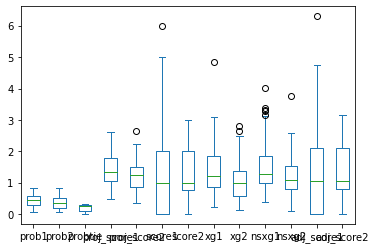

In [14]:
new_df = matches.drop(columns=['league_id', 'spi1', 'spi2'])
new_df.plot.box()

In [15]:
# fig, axs = plt.subplots(figsize=(12, 4))        # Create an empty matplotlib Figure and Axes
# new_df.plot.area(ax=axs)                   # Use pandas to put the area plot on the prepared Figure/Axes
# axs.set_ylabel("Date")          # Do any matplotlib customization you like
# fig.savefig("testing.png")           # Save the Figure/Axes using the existing matplotlib method.


In [16]:
# df = df.rename(columns=str.lower)

In [17]:
new_df.columns

Index(['league', 'team1', 'team2', 'prob1', 'prob2', 'probtie', 'proj_score1',
       'proj_score2', 'score1', 'score2', 'xg1', 'xg2', 'nsxg1', 'nsxg2',
       'adj_score1', 'adj_score2'],
      dtype='object')

In [18]:
new_df.groupby("score1").mean()

,prob1,prob2,probtie,proj_score1,proj_score2,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
score1,,,,,,,,,,,,
0,0.302400,0.458224,0.239412,1.114118,1.456471,1.529412,0.829412,1.115294,1.192353,1.259412,0.000000,1.547059
1,0.451336,0.360277,0.188395,1.412727,1.200000,1.136364,1.442727,1.177727,1.576818,1.128182,1.050000,1.174091
2,0.500573,0.343227,0.156187,1.515333,1.140000,0.866667,1.669333,1.028000,1.751333,1.415333,1.970667,0.910000
3,0.537300,0.261820,0.200880,1.696000,1.040000,1.200000,1.840000,0.866000,1.914000,1.282000,3.000000,1.260000
4,0.569200,0.430800,0.000000,1.395000,1.135000,2.500000,1.645000,0.825000,0.840000,1.465000,4.200000,2.625000
5,0.708950,0.098750,0.192250,2.250000,0.695000,1.000000,3.225000,0.655000,1.830000,0.770000,4.460000,1.050000
6,0.757400,0.053800,0.188900,2.040000,0.360000,1.000000,3.060000,1.020000,1.350000,0.890000,6.300000,1.050000


In [19]:
# new_df.groupby("score1")["xg1"].mean()

In [20]:
# new_df[["score1", "xg1"]].groupby("score1").mean()

In [21]:
# new_df.groupby(["score1", "xg1"])["nsxg1"].mean()

In [22]:
# new_df.groupby("score1")["score1"].count()

In [23]:
# new_df.sort_values(by="score1").head()

In [24]:
# new_df['team1'].value_counts()

In [25]:
# #Adding goal difference and establishing who is the winner 
# winner = []
# for i in range (len(matches['team2'])):
#     if matches ['score2'][i] > matches['score1'][i]:
#         winner.append(matches['team2'][i])
#     elif matches['score2'][i] < matches ['score1'][i]:
#         winner.append(matches['team1'][i])
#     else:
#         winner.append('Draw')
# matches['winning_team'] = winner

# #adding goal difference column
# matches['goal_difference'] = np.absolute(matches['score2'] - matches['score1'])

# # matches.head()

In [26]:
matches.shape

(64, 19)

## World Cup Comparisons Data

In [27]:
comparisons = pd.read_csv('world_cup_comparisons.csv')

In [28]:
comparisons.columns

Index(['player', 'season', 'team', 'goals_z', 'xg_z', 'crosses_z',
       'boxtouches_z', 'passes_z', 'progpasses_z', 'takeons_z', 'progruns_z',
       'tackles_z', 'interceptions_z', 'clearances_z', 'blocks_z', 'aerials_z',
       'fouls_z', 'fouled_z', 'nsxg_z'],
      dtype='object')

In [29]:
comparisons.shape

(5899, 19)

### Change comparisons to world cups 2018, 2014, and 2010, 2004, 2000

comparisons years 2000-2018

In [30]:
years

[2018, 2014, 2010, 2006, 2002]

In [31]:
comparisons['season'].value_counts()

2018    560
2006    559
2014    558
2010    550
2002    537
1998    533
1986    399
1994    397
1990    389
1982    374
1978    266
1970    265
1974    258
1966    254
Name: season, dtype: int64

In [32]:
comparisons = comparisons.loc[comparisons['season'].isin(years)]

In [33]:
comparisons.shape

(2764, 19)

comparisons teams that are in world cup 2022

In [34]:
comparisons = comparisons.loc[comparisons['team'].isin(teams_2022)]

In [35]:
comparisons.shape

(1837, 19)

In [36]:
comparisons.head()

,player,season,team,goals_z,xg_z,crosses_z,boxtouches_z,passes_z,progpasses_z,takeons_z,progruns_z,tackles_z,interceptions_z,clearances_z,blocks_z,aerials_z,fouls_z,fouled_z,nsxg_z
0,Cristian Pavón,2018,Argentina,-0.42,-0.55,0.08,-0.24,-0.61,-0.72,-0.05,0.15,0.30,-0.79,-0.80,-0.45,-0.23,-0.38,-0.91,-0.58
1,Eduardo Salvio,2018,Argentina,-0.42,-0.50,-0.51,0.64,0.02,-0.46,-0.05,0.48,0.61,0.67,0.32,-0.45,0.21,-1.11,0.68,-0.03
2,Enzo Pérez,2018,Argentina,-0.42,0.11,-0.51,-0.69,0.27,-0.65,-0.36,-0.34,0.35,-0.22,-0.80,-0.45,-0.89,0.72,0.04,-0.66
3,Federico Fazio,2018,Argentina,-0.42,-0.59,-0.51,-0.69,-0.97,-0.91,-0.67,-0.84,-0.82,-0.79,-0.64,-0.45,0.21,-1.11,-0.59,-0.77
4,Franco Armani,2018,Argentina,-0.42,-0.59,-0.51,-0.80,-0.67,0.64,-0.67,-0.67,-0.82,-0.79,-0.64,-0.45,-0.89,-1.11,-0.91,-0.77


In [37]:
comparisons.tail()

,player,season,team,goals_z,xg_z,crosses_z,boxtouches_z,passes_z,progpasses_z,takeons_z,progruns_z,tackles_z,interceptions_z,clearances_z,blocks_z,aerials_z,fouls_z,fouled_z,nsxg_z
2759,Mario Regueiro,2002,Uruguay,-0.41,-0.65,0.02,0.18,-1.15,-0.89,1.49,0.10,-0.45,-0.16,-0.75,-0.52,-0.31,-0.80,1.08,-0.75
2760,Pablo García,2002,Uruguay,-0.41,-0.07,0.02,-0.74,1.53,0.48,-0.21,0.65,2.76,2.24,-0.05,1.47,0.10,0.33,0.72,0.42
2761,Richard Morales,2002,Uruguay,1.70,1.85,-0.56,1.41,-1.38,-1.08,-0.77,-1.01,-0.95,-1.01,-0.75,-0.52,0.10,-0.80,-0.71,-0.35
2762,Ronald Paolo Montero Iglesias,2002,Uruguay,-0.41,-0.65,-0.56,-0.74,1.76,1.41,0.36,1.76,0.65,0.38,2.31,2.73,2.19,0.33,-0.71,-0.60
2763,Sebastián Abreu,2002,Uruguay,-0.41,0.64,-0.56,0.64,-1.10,-1.01,-0.21,-0.46,-0.45,-0.83,-0.47,-0.52,0.94,1.84,0.36,-0.60


In [38]:
year2002 = [2002]
year2006 = [2006]
year2010 = [2010]
year2014 = [2014]
year2018 = [2018]

# Germany

## 2010

In [39]:
comparisons = comparisons.drop(columns = ['player', 'crosses_z', 'passes_z', 'takeons_z', 'tackles_z', 'interceptions_z', 'clearances_z', 'blocks_z', 'aerials_z'])


In [40]:
comparisons

,season,team,goals_z,xg_z,boxtouches_z,progpasses_z,progruns_z,fouls_z,fouled_z,nsxg_z
0,2018,Argentina,-0.42,-0.55,-0.24,-0.72,0.15,-0.38,-0.91,-0.58
1,2018,Argentina,-0.42,-0.50,0.64,-0.46,0.48,-1.11,0.68,-0.03
2,2018,Argentina,-0.42,0.11,-0.69,-0.65,-0.34,0.72,0.04,-0.66
3,2018,Argentina,-0.42,-0.59,-0.69,-0.91,-0.84,-1.11,-0.59,-0.77
4,2018,Argentina,-0.42,-0.59,-0.80,0.64,-0.67,-1.11,-0.91,-0.77
...,...,...,...,...,...,...,...,...,...,...
2759,2002,Uruguay,-0.41,-0.65,0.18,-0.89,0.10,-0.80,1.08,-0.75
2760,2002,Uruguay,-0.41,-0.07,-0.74,0.48,0.65,0.33,0.72,0.42
2761,2002,Uruguay,1.70,1.85,1.41,-1.08,-1.01,-0.80,-0.71,-0.35
2762,2002,Uruguay,-0.41,-0.65,-0.74,1.41,1.76,0.33,-0.71,-0.60


In [41]:
ger = ["Germany"]

In [42]:
ger_year = comparisons.loc[comparisons["team"].isin(ger)]

In [43]:
ger2010year = ger_year.loc[ger_year["season"].isin(year2010)]

In [44]:
ger2010xg = ger2010year.sort_values(by=["xg_z"], ascending=False)

In [45]:
ger2010xg13 = ger2010xg.head(13)

#### top 13 players from Germany in 2010 by XG

### Remove columns

'boxtouches_z', 'progpasses_z', 'progruns_z'

In [46]:
ger2010xg13 = ger2010xg13.drop(columns=['season', 'team'])


In [47]:
ger2010 = ger2010xg13.mean()

In [48]:
ger2010

goals_z         0.816923
xg_z            0.513077
boxtouches_z    0.458462
progpasses_z   -0.367692
progruns_z      0.142308
fouls_z        -0.294615
fouled_z       -0.134615
nsxg_z          0.328462
dtype: float64

In [49]:
(.513077 + .328462) / .816923

1.0301325828750079

### Fouled

In [50]:
-0.134615 - -0.294615

0.16

# Setup New DF for derived stats

In [51]:
# initialize list of lists
data = [['Germany', 2010, 0.816923, 0.513077, 0.458462, -0.367692, 0.142308, 1.0301]]
  
# Create the pandas DataFrame
stats_df = pd.DataFrame(data, columns=['Country', 'Year', 'goals_z', 'xg_z', 'boxtouches_z', 'progpasses_z', 'progruns_z', 'new_xg'])
  

In [52]:
stats_df['Fouled'] = 0.16
stats_df['results'] = 3
stats_df

,Country,Year,goals_z,xg_z,boxtouches_z,progpasses_z,progruns_z,new_xg,Fouled,results
0,Germany,2010,0.816923,0.513077,0.458462,-0.367692,0.142308,1.0301,0.16,3


## 2014

In [53]:
ger2014year = ger_year.loc[ger_year["season"].isin(year2014)]

In [54]:
ger2014xg = ger2014year.sort_values(by=["xg_z"], ascending=False)

In [55]:
ger2014xg13 = ger2014xg.head(13)

In [56]:
ger2014xg13 = ger2014xg13.drop(columns=['season', 'team',])


In [57]:
ger2014 = ger2014xg13.mean()

In [58]:
ger2014

goals_z         0.755385
xg_z            0.719231
boxtouches_z    0.601538
progpasses_z    0.316154
progruns_z      0.198462
fouls_z         0.022308
fouled_z        0.186154
nsxg_z          0.527692
dtype: float64

In [59]:
(.719231 + .527692) / 0.755385

1.650711888639568

### Fouled

In [60]:
0.186154 - 0.022308

0.163846

In [61]:
new_row = {'Country': 'Germany', 'Year': 2014, 'goals_z': 0.755385, 'xg_z': 0.719231, 'boxtouches_z': 0.601538, 'progpasses_z': 0.316154, 'progruns_z': 0.198462, 'new_xg': 1.65071, 'Fouled': 0.163846, 'results': 1}

stats_df = stats_df.append(new_row, ignore_index=True)

In [62]:
stats_df

,Country,Year,goals_z,xg_z,boxtouches_z,progpasses_z,progruns_z,new_xg,Fouled,results
0,Germany,2010,0.816923,0.513077,0.458462,-0.367692,0.142308,1.03010,0.160000,3
1,Germany,2014,0.755385,0.719231,0.601538,0.316154,0.198462,1.65071,0.163846,1


## 2018 

In [63]:
ger2018year = ger_year.loc[ger_year["season"].isin(year2018)]

In [64]:
ger2018xg = ger2018year.sort_values(by=["xg_z"], ascending=False)

In [65]:
ger2018xg13 = ger2018xg.head(13)

In [66]:
ger2018xg13 = ger2018xg13.drop(columns=['season', 'team'])


In [67]:
ger2018 = ger2018xg13.mean()

In [68]:
ger2018

goals_z        -0.066154
xg_z            0.615385
boxtouches_z    1.570000
progpasses_z    0.565385
progruns_z      0.930769
fouls_z        -0.323077
fouled_z        0.196923
nsxg_z          1.417692
dtype: float64

In [69]:
(.615385 + 1.417692) / -0.066154

-30.732487831423647

### Fouled

In [70]:
0.196923 - -0.323077

0.52

In [71]:
new_row = {'Country': 'Germany', 'Year': 2018, 'goals_z': -0.066154, 
           'xg_z': 0.615385, 'boxtouches_z': 1.570000, 
           'progpasses_z': 0.565385, 'progruns_z': 0.930769, 'new_xg': -30.73248, 
           'Fouled': 0.52, 'results': 32}

stats_df = stats_df.append(new_row, ignore_index=True)

In [72]:
stats_df

,Country,Year,goals_z,xg_z,boxtouches_z,progpasses_z,progruns_z,new_xg,Fouled,results
0,Germany,2010,0.816923,0.513077,0.458462,-0.367692,0.142308,1.03010,0.160000,3
1,Germany,2014,0.755385,0.719231,0.601538,0.316154,0.198462,1.65071,0.163846,1
2,Germany,2018,-0.066154,0.615385,1.570000,0.565385,0.930769,-30.73248,0.520000,32


## 2006

In [73]:
ger2006year = ger_year.loc[ger_year["season"].isin(year2006)]

In [74]:
ger2006xg = ger2006year.sort_values(by=["xg_z"], ascending=False)

In [75]:
ger2006xg13 = ger2006xg.head(13)

In [76]:
ger2006xg13 = ger2006xg13.drop(columns=['season', 'team'])


In [77]:
ger2006 = ger2006xg13.mean()

In [78]:
ger2006

goals_z         0.560000
xg_z            0.482308
boxtouches_z    0.450769
progpasses_z    0.300769
progruns_z      0.272308
fouls_z         0.220769
fouled_z        0.354615
nsxg_z          0.350769
dtype: float64

In [79]:
(.482308 + 0.350769) / 0.560000

1.4876375

### Fouled

In [80]:
.354615 - .220769

0.13384600000000002

In [81]:
new_row = {'Country': 'Germany', 'Year': 2006, 'goals_z': 0.560000, 
           'xg_z': 0.482308, 'boxtouches_z': 0.450769, 
           'progpasses_z': 0.300769, 'progruns_z': 0.272308, 'new_xg': 1.4876375, 
           'Fouled': 1.4876375, 'results': 3}

stats_df = stats_df.append(new_row, ignore_index=True)

## 2002

In [82]:
ger2002year = ger_year.loc[ger_year["season"].isin(year2002)]

In [83]:
ger2002xg = ger2002year.sort_values(by=["xg_z"], ascending=False)

In [84]:
ger2002xg13 = ger2002xg.head(13)

In [85]:
ger2002xg13 = ger2002xg13.drop(columns=['season', 'team'])


In [86]:
ger2002 = ger2002xg13.mean()

In [87]:
ger2002

goals_z         0.563077
xg_z            0.426923
boxtouches_z    0.280769
progpasses_z   -0.102308
progruns_z      0.011538
fouls_z         0.211538
fouled_z        0.265385
nsxg_z          0.512308
dtype: float64

In [88]:
(.426923 + 0.512308) / 0.563077

1.6680329688479547

### Fouled

In [89]:
.265385 - .211538

0.05384699999999998

In [90]:
new_row = {'Country': 'Germany', 'Year': 2002, 'goals_z': 0.563077, 
           'xg_z': 0.426923, 'boxtouches_z': 0.280769, 
           'progpasses_z': -0.102308, 'progruns_z': 0.011538, 'new_xg': 1.668032968, 
           'Fouled': 0.05384699, 'results': 2}

stats_df = stats_df.append(new_row, ignore_index=True)

# Switzerland
* 2010: -1.76 
* 2014: 1.954
* 2018: 2.143

In [91]:
swits = ['Switzerland']

In [92]:
swiss_year = comparisons.loc[comparisons["team"].isin(swits)]

In [93]:
swiss2010year = swiss_year.loc[swiss_year["season"].isin(year2010)]

In [94]:
ch2010xg = swiss2010year.sort_values(by=["xg_z"], ascending=False)

In [95]:
ch2010xg13 = ch2010xg.head(13)

In [96]:
ch2010xg13 = ch2010xg13.drop(columns=['season', 'team'])


In [97]:
ch2010 = ch2010xg13.mean()

In [98]:
ch2010

goals_z        -0.222308
xg_z            0.122308
boxtouches_z    0.128462
progpasses_z    0.071538
progruns_z     -0.068462
fouls_z         0.429231
fouled_z        0.042308
nsxg_z          0.269231
dtype: float64

In [99]:
(.122308 + .269231) / -0.222308

-1.761245659175558

### Fouled

In [100]:
.042308 - .429231

-0.38692299999999996

In [101]:
new_row = {'Country': 'Switzerland', 'Year': 2010, 'goals_z': -0.222308, 'xg_z': 0.122308,
           'boxtouches_z': 0.128462, 'progpasses_z': 0.071538, 'progruns_z': -0.068462, 
           'new_xg': -1.7612, 'Fouled': -0.3869, 'results': 32}

stats_df = stats_df.append(new_row, ignore_index=True)

In [102]:
stats_df

,Country,Year,goals_z,xg_z,boxtouches_z,progpasses_z,progruns_z,new_xg,Fouled,results
0,Germany,2010,0.816923,0.513077,0.458462,-0.367692,0.142308,1.030100,0.160000,3
1,Germany,2014,0.755385,0.719231,0.601538,0.316154,0.198462,1.650710,0.163846,1
2,Germany,2018,-0.066154,0.615385,1.570000,0.565385,0.930769,-30.732480,0.520000,32
3,Germany,2006,0.560000,0.482308,0.450769,0.300769,0.272308,1.487637,1.487637,3
4,Germany,2002,0.563077,0.426923,0.280769,-0.102308,0.011538,1.668033,0.053847,2
5,Switzerland,2010,-0.222308,0.122308,0.128462,0.071538,-0.068462,-1.761200,-0.386900,32


## 2014

In [103]:
swiss2014year = swiss_year.loc[swiss_year["season"].isin(year2014)]

In [104]:
ch2014xg = swiss2014year.sort_values(by=["xg_z"], ascending=False)

In [105]:
ch2014xg13 = ch2014xg.head(13)

In [106]:
ch2014xg13 = ch2014xg13.drop(columns=['season', 'team'])


In [107]:
ch2014 = ch2014xg13.mean()

In [108]:
ch2014

goals_z         0.387692
xg_z            0.550769
boxtouches_z    0.138462
progpasses_z    0.213077
progruns_z      0.050769
fouls_z         0.323077
fouled_z        0.382308
nsxg_z          0.206923
dtype: float64

In [109]:
(.550769 + .206923) / .387692

1.954365836798283

### Fouled

In [110]:
.382308 - .323077

0.05923099999999998

In [111]:
new_row = {'Country': 'Switzerland', 'Year': 2014,  'goals_z': 0.387692, 'xg_z': 0.550769, 
           'boxtouches_z': 0.138462, 'progpasses_z': 0.213077, 'progruns_z': 0.050769, 
           'new_xg': 1.9543, 'Fouled': 0.05923, 'results': 16}

stats_df = stats_df.append(new_row, ignore_index=True)

In [112]:
stats_df

,Country,Year,goals_z,xg_z,boxtouches_z,progpasses_z,progruns_z,new_xg,Fouled,results
0,Germany,2010,0.816923,0.513077,0.458462,-0.367692,0.142308,1.030100,0.160000,3
1,Germany,2014,0.755385,0.719231,0.601538,0.316154,0.198462,1.650710,0.163846,1
2,Germany,2018,-0.066154,0.615385,1.570000,0.565385,0.930769,-30.732480,0.520000,32
3,Germany,2006,0.560000,0.482308,0.450769,0.300769,0.272308,1.487637,1.487637,3
4,Germany,2002,0.563077,0.426923,0.280769,-0.102308,0.011538,1.668033,0.053847,2
5,Switzerland,2010,-0.222308,0.122308,0.128462,0.071538,-0.068462,-1.761200,-0.386900,32
6,Switzerland,2014,0.387692,0.550769,0.138462,0.213077,0.050769,1.954300,0.059230,16


## 2018

In [113]:
swiss2018year = swiss_year.loc[swiss_year["season"].isin(year2018)]

In [114]:
ch2018xg = swiss2018year.sort_values(by=["xg_z"], ascending=False)

In [115]:
ch2018xg13 = ch2018xg.head(13)

In [116]:
ch2018xg13 = ch2018xg13.drop(columns=['season', 'team'])


In [117]:
ch2018 = ch2018xg13.mean()

In [118]:
ch2018

goals_z         0.241538
xg_z            0.330769
boxtouches_z    0.181538
progpasses_z    0.113077
progruns_z      0.286923
fouls_z        -0.040000
fouled_z        0.116154
nsxg_z          0.186923
dtype: float64

In [119]:
(.330769 + .186923) / 0.241538

2.143314923531701

### Fouled

In [120]:
.116154 - -0.040000

0.156154

In [121]:
new_row = {'Country': 'Switzerland', 'Year': 2018, 'goals_z': 0.241538, 'xg_z': 0.330769, 
           'boxtouches_z': 0.181538, 'progpasses_z': 0.113077, 'progruns_z': 0.286923, 
           'new_xg': 2.1433, 'Fouled': 0.1561, 'results': 16}

stats_df = stats_df.append(new_row, ignore_index=True)

In [701]:
# stats_df

## 2006

In [702]:
swiss2006year = swiss_year.loc[swiss_year["season"].isin(year2006)]

In [703]:
ch2006xg = swiss2006year.sort_values(by=["xg_z"], ascending=False)

In [705]:
ch2006xg13 = ch2006xg.head(13)

In [706]:
ch2006xg13 = ch2006xg13.drop(columns=['season', 'team'])


In [707]:
ch2006 = ch2006xg13.mean()

In [708]:
ch2006

goals_z         0.113077
xg_z            0.003846
boxtouches_z   -0.033077
progpasses_z    0.148462
progruns_z     -0.072308
fouls_z        -0.151538
fouled_z        0.146154
nsxg_z         -0.044615
dtype: float64

In [709]:
(.003846 + -0.044615) / 0.113077

-0.3605419316041282

### Fouled

In [710]:
.146154 - -0.151538

0.297692

In [711]:
new_row = {'Country': 'Switzerland', 'Year': 2006, 'goals_z': 0.113077, 'xg_z': 0.003846, 
           'boxtouches_z': -0.033077, 'progpasses_z': 0.148462, 'progruns_z': -0.072308, 
           'new_xg': -0.360541, 'Fouled': 0.297692, 'results': 16}

stats_df = stats_df.append(new_row, ignore_index=True)

## 2002 NA

# Spain

In [123]:
es = ['Spain']

In [124]:
es_year = comparisons.loc[comparisons["team"].isin(es)]

In [125]:
es2010year = es_year.loc[es_year["season"].isin(year2010)]

In [126]:
es2010xg = es2010year.sort_values(by=["xg_z"], ascending=False)

In [127]:
es2010xg13 = es2010xg.head(13)

In [128]:
es2010xg13 = es2010xg13.drop(columns=['season', 'team'])


In [129]:
es2010 = es2010xg13.mean()

In [130]:
es2010

goals_z         0.180000
xg_z            0.539231
boxtouches_z    0.868462
progpasses_z    0.320000
progruns_z      1.432308
fouls_z        -0.138462
fouled_z        0.464615
nsxg_z          0.762308
dtype: float64

In [131]:
(.539231 + .762308) / .180000

7.230772222222223

### Fouled

In [132]:
.464615 - -0.138462

0.603077

In [133]:
new_row = {'Country': 'Spain', 'Year': 2010, 'goals_z': 0.180000, 'xg_z': 0.539231, 
           'boxtouches_z': 0.868462,'progpasses_z': 0.320000, 'progruns_z': 1.432308, 
           'new_xg': 7.2307, 'Fouled': 0.60307, 'results': 1}

stats_df = stats_df.append(new_row, ignore_index=True)

## 2014

In [134]:
es2014year = es_year.loc[es_year["season"].isin(year2014)]

In [135]:
es2014xg = es2014year.sort_values(by=["xg_z"], ascending=False)

In [136]:
es2014xg13 = es2014xg.head(13)

In [137]:
es2014xg13 = es2014xg13.drop(columns=['season', 'team'])


In [138]:
es2014 = es2014xg13.mean()

In [139]:
es2014

goals_z         0.243846
xg_z            0.536154
boxtouches_z    0.596923
progpasses_z   -0.052308
progruns_z      0.489231
fouls_z        -0.391538
fouled_z        0.333077
nsxg_z          0.412308
dtype: float64

In [140]:
(.536154 + .412308) / .243846

3.889594252109938

### Fouled

In [141]:
0.333077 - -0.391538

0.724615

In [142]:
new_row = {'Country': 'Spain', 'Year': 2014, 'goals_z': 0.243846, 'xg_z': 0.536154, 
           'boxtouches_z': 0.596923, 'progpasses_z': -0.052308, 'progruns_z': 0.489231, 
           'new_xg': 3.8895, 'Fouled': 0.724615, 'results': 32}

stats_df = stats_df.append(new_row, ignore_index=True)

## 2018

In [143]:
es2018year = es_year.loc[es_year["season"].isin(year2018)]

In [144]:
es2018xg = es2018year.sort_values(by=["xg_z"], ascending=False)

In [145]:
es2018xg13 = es2018xg.head(13)

In [146]:
es2018xg13 = es2018xg13.drop(columns=['season', 'team'])


In [147]:
es2018 = es2018xg13.mean()

In [148]:
es2018

goals_z         0.190769
xg_z            0.680769
boxtouches_z    0.763077
progpasses_z    0.267692
progruns_z      0.981538
fouls_z        -0.410000
fouled_z        0.195385
nsxg_z          0.726154
dtype: float64

In [149]:
(.680769 + .726154) / .190769

7.375008518155465

### Fouled

In [150]:
.195385 - -0.410000

0.605385

In [151]:
new_row = {'Country': 'Spain', 'Year': 2018, 'goals_z': 0.190769, 'xg_z': 0.680769, 
           'boxtouches_z': 0.763077, 'progpasses_z': 0.267692, 'progruns_z': 0.981538, 
           'new_xg': 7.37500, 'Fouled': 0.605385, 'results': 16}

stats_df = stats_df.append(new_row, ignore_index=True)

In [713]:
# stats_df

## 2006

In [714]:
es2006year = es_year.loc[es_year["season"].isin(year2006)]

In [715]:
es2006xg = es2006year.sort_values(by=["xg_z"], ascending=False)

In [716]:
es2006xg13 = es2006xg.head(13)

In [717]:
es2006xg13 = es2006xg13.drop(columns=['season', 'team'])


In [718]:
es2006 = es2006xg13.mean()

In [719]:
es2006

goals_z         0.881538
xg_z            1.015385
boxtouches_z    0.533077
progpasses_z    0.266154
progruns_z      0.080000
fouls_z         0.041538
fouled_z        0.093077
nsxg_z          0.650769
dtype: float64

In [721]:
(1.015385 + .650769) / .881538

1.890053520097829

### Fouled

In [722]:
.093077 - .041538

0.051538999999999995

In [723]:
new_row = {'Country': 'Spain', 'Year': 2006, 'goals_z': 0.881538, 'xg_z': 1.015385, 
           'boxtouches_z': 0.533077, 'progpasses_z': 0.266154, 'progruns_z': 0.080000, 
           'new_xg': 1.890053, 'Fouled': 0.051538999, 'results': 16}

stats_df = stats_df.append(new_row, ignore_index=True)

## 2002

In [724]:
es2002year = es_year.loc[es_year["season"].isin(year2002)]

In [725]:
es2002xg = es2002year.sort_values(by=["xg_z"], ascending=False)

In [726]:
es2002xg13 = es2002xg.head(13)

In [727]:
es2002xg13 = es2002xg13.drop(columns=['season', 'team'])


In [728]:
es2002 = es2002xg13.mean()

In [729]:
es2002

goals_z         0.451538
xg_z            0.495385
boxtouches_z    0.182308
progpasses_z   -0.222308
progruns_z      0.130769
fouls_z        -0.287692
fouled_z        0.157692
nsxg_z          0.132308
dtype: float64

In [730]:
(.495385 + .132308) / .451538

1.3901222045542125

### Fouled

In [731]:
.157692 - -0.287692

0.445384

In [732]:
new_row = {'Country': 'Spain', 'Year': 2002, 'goals_z': 0.451538, 'xg_z': 0.495385, 
           'boxtouches_z': 0.182308, 'progpasses_z': -0.222308, 'progruns_z': 0.130769, 
           'new_xg': 1.390122, 'Fouled': 0.445384, 'results': 8}

stats_df = stats_df.append(new_row, ignore_index=True)

#  Portugal

In [153]:
port = ['Portugal']

In [154]:
port_year = comparisons.loc[comparisons["team"].isin(port)]

In [155]:
port2010year = port_year.loc[port_year["season"].isin(year2010)]

In [156]:
port2010xg = port2010year.sort_values(by=["xg_z"], ascending=False)

In [157]:
port2010xg13 = port2010xg.head(13)

In [158]:
port2010xg13 = port2010xg13.drop(columns=['season', 'team',])


In [159]:
port2010 = port2010xg13.mean()

In [160]:
port2010

goals_z         0.531538
xg_z            0.284615
boxtouches_z    0.100769
progpasses_z   -0.300000
progruns_z      0.180769
fouls_z         0.236154
fouled_z       -0.030000
nsxg_z          0.053077
dtype: float64

In [161]:
(.284615 + .053077) / .531538

0.6353111160443844

### Fouled

In [162]:
-0.030000 - .236154

-0.266154

In [163]:
new_row = {'Country': 'Portugal', 'Year': 2010, 'goals_z': 0.531538, 'xg_z': 0.284615, 
           'boxtouches_z': 0.100769, 'progpasses_z': -0.300000, 'progruns_z': 0.180769, 
           'new_xg': 0.63531, 'Fouled': -0.2661, 'results': 16}

stats_df = stats_df.append(new_row, ignore_index=True)

In [164]:
stats_df.corr()

,Year,goals_z,xg_z,boxtouches_z,progpasses_z,progruns_z,new_xg,Fouled,results
Year,1.000000,-0.386209,0.353057,0.396761,0.424772,0.376182,-0.279985,-0.003637,0.498293
goals_z,-0.386209,1.000000,0.314932,-0.298576,-0.448320,-0.363449,0.371578,0.078754,-0.762785
xg_z,0.353057,0.314932,1.000000,0.622845,0.469303,0.483223,-0.072629,0.499219,-0.289669
boxtouches_z,0.396761,-0.298576,0.622845,1.000000,0.633065,0.751078,-0.633811,0.457643,0.176230
progpasses_z,0.424772,-0.448320,0.469303,0.633065,1.000000,0.530904,-0.403293,0.454482,0.121157
progruns_z,0.376182,-0.363449,0.483223,0.751078,0.530904,1.000000,-0.115447,0.465538,0.009585
new_xg,-0.279985,0.371578,-0.072629,-0.633811,-0.403293,-0.115447,1.000000,0.008590,-0.479136
Fouled,-0.003637,0.078754,0.499219,0.457643,0.454482,0.465538,0.008590,1.000000,-0.185871
results,0.498293,-0.762785,-0.289669,0.176230,0.121157,0.009585,-0.479136,-0.185871,1.000000


## 2014

In [165]:
port2014year = port_year.loc[port_year["season"].isin(year2014)]

In [166]:
port2014xg = port2014year.sort_values(by=["xg_z"], ascending=False)

In [167]:
port2014xg13 = port2014xg.head(13)

In [168]:
port2014xg13 = port2014xg13.drop(columns=['season', 'team'])


In [169]:
port2014 = port2014xg13.mean()

In [170]:
port2014

goals_z         0.075385
xg_z            0.529231
boxtouches_z    0.245385
progpasses_z    0.480769
progruns_z      0.350769
fouls_z         0.185385
fouled_z        0.036154
nsxg_z          0.301538
dtype: float64

In [171]:
(.529231 + .301538) / .075385


11.020348875771043

### Fouled

In [172]:
.036154 - .185385

-0.149231

In [173]:
new_row = {'Country': 'Portugal', 'Year': 2014, 'goals_z': 0.075385, 'xg_z': 0.529231, 
           'boxtouches_z': 0.245385, 'progpasses_z': 0.480769, 'progruns_z': 0.350769, 
           'new_xg': 11.02034, 'Fouled': -0.149231, 'results': 32}

stats_df = stats_df.append(new_row, ignore_index=True)

## 2018

In [174]:
port2018year = port_year.loc[port_year["season"].isin(year2018)]

In [175]:
port2018xg = port2018year.sort_values(by=["xg_z"], ascending=False)

In [176]:
port2018xg13 = port2018xg.head(13)

In [177]:
port2018xg13 = port2018xg13.drop(columns=['season', 'team'])


In [178]:
port2018 = port2018xg13.mean()

In [179]:
port2018

goals_z         0.373846
xg_z            0.166154
boxtouches_z    0.044615
progpasses_z   -0.044615
progruns_z      0.212308
fouls_z         0.183846
fouled_z        0.386154
nsxg_z          0.120000
dtype: float64

In [180]:
(.166154 - .120000) / .373846

0.12345725245154422

### Fouled

In [181]:
.386154 - .183846

0.202308

In [182]:
new_row = {'Country': 'Portugal', 'Year': 2018, 'goals_z': 0.373846, 'xg_z': 0.166154, 
           'boxtouches_z': 0.044615, 'progpasses_z': -0.044615, 'progruns_z': 0.212308, 
           'new_xg': 0.123457, 'Fouled': 0.202308, 'results': 16}

stats_df = stats_df.append(new_row, ignore_index=True)

# Netherlands

In [183]:
ned = ['Netherlands']

In [184]:
ned_year = comparisons.loc[comparisons["team"].isin(ned)]

In [185]:
ned2010year = ned_year.loc[ned_year["season"].isin(year2010)]

In [186]:
ned2010xg = ned2010year.sort_values(by=["xg_z"], ascending=False)

In [187]:
ned2010xg13 = ned2010xg.head(13)

In [188]:
ned2010xg13 = ned2010xg13.drop(columns=['season', 'team'])


In [189]:
ned2010 = ned2010xg13.mean()

In [190]:
ned2010

goals_z         0.396923
xg_z            0.126923
boxtouches_z    0.162308
progpasses_z    0.073077
progruns_z      0.135385
fouls_z         0.368462
fouled_z        0.439231
nsxg_z          0.127692
dtype: float64

In [191]:
(.126923 + .127692) / .396923

0.6414720235410899

### Fouled

In [192]:
.439231 - .368462

0.07076899999999997

In [193]:
new_row = {'Country': 'Netherlands', 'Year': 2010, 'goals_z': 0.396923, 'xg_z': 0.126923, 
           'boxtouches_z': 0.162308, 'progpasses_z': 0.073077, 'progruns_z': 0.135385, 
           'new_xg': 0.64147, 'Fouled': 0.0707, 'results': 2}

stats_df = stats_df.append(new_row, ignore_index=True)

## 2014

In [194]:
ned2014year = ned_year.loc[ned_year["season"].isin(year2014)]

In [195]:
ned2014xg = ned2014year.sort_values(by=["xg_z"], ascending=False)

In [196]:
ned2014xg13 = ned2014xg.head(13)


In [197]:
ned2014xg13 = ned2014xg13.drop(columns=['season', 'team'])


In [198]:
ned2014 = ned2014xg13.mean()


In [199]:
ned2014

goals_z         0.493846
xg_z            0.406923
boxtouches_z    0.096923
progpasses_z   -0.169231
progruns_z      0.098462
fouls_z         0.289231
fouled_z       -0.020000
nsxg_z          0.103846
dtype: float64

In [200]:
(.406923 + .103846) / .493846


1.0342677676846628

### Fouled

In [201]:
-0.020000 - .289231

-0.30923100000000003

In [202]:
new_row = {'Country': 'Netherlands', 'Year': 2014, 'goals_z': 0.493846, 'xg_z': 0.406923, 
           'boxtouches_z': 0.096923, 'progpasses_z': -0.169231, 'progruns_z': 0.098462, 
           'new_xg': 1.0342677, 'Fouled': -0.309231, 'results': 3}
stats_df = stats_df.append(new_row, ignore_index=True)

## 2018 - NA

# Brazil

In [203]:
bra = ['Brazil']

In [204]:
bra_year = comparisons.loc[comparisons["team"].isin(bra)]

In [205]:
bra2010year = bra_year.loc[bra_year["season"].isin(year2010)]

In [206]:
bra2010xg = bra2010year.sort_values(by=["xg_z"], ascending=False)

In [207]:
bra2010xg13 = bra2010xg.head(13)

In [208]:
bra2010xg13 = bra2010xg13.drop(columns=['season', 'team'])


In [209]:
bra2010 = bra2010xg13.mean()

In [210]:
bra2010

goals_z         0.557692
xg_z            0.186923
boxtouches_z    0.398462
progpasses_z    0.247692
progruns_z      0.937692
fouls_z         0.248462
fouled_z        0.331538
nsxg_z          0.535385
dtype: float64

In [211]:
(.186923 + .535385) / .557692

1.2951736800958236

### Fouled

In [212]:
.331538 - .248462

0.08307600000000001

In [213]:
new_row = {'Country': 'Brazil', 'Year': 2010, 'goals_z': 0.557692,'xg_z': 0.186923, 
           'boxtouches_z': 0.398462, "progpasses_z": 0.247692, 'progruns_z': 0.937692, 
           'new_xg': 1.29517, 'Fouled': 0.08307, 'results': 8}

stats_df = stats_df.append(new_row, ignore_index=True)

## 2014

In [214]:
bra2014year = bra_year.loc[bra_year["season"].isin(year2014)]


In [215]:
bra2014xg = bra2014year.sort_values(by=["xg_z"], ascending=False)


In [216]:
bra2014xg13 = bra2014xg.head(13)


In [217]:
bra2014xg13 = bra2014xg13.drop(columns=['season', 'team'])


In [218]:
bra2014 = bra2014xg13.mean()


In [219]:
bra2014

goals_z         0.328462
xg_z            0.376154
boxtouches_z    0.475385
progpasses_z   -0.193077
progruns_z      0.408462
fouls_z         0.443846
fouled_z        0.551538
nsxg_z          0.291538
dtype: float64

In [220]:
(.376154 + .291538) / .328462


2.032783092108067

### Fouled

In [221]:
.551538 - .443846

0.10769199999999995

In [222]:
new_row = {'Country': 'Brazil', 'Year': 2014, 'goals_z':0.328462, 'xg_z': 0.376154, 
           'boxtouches_z':0.475385, 'progpasses_z':-0.193077, 'progruns_z':0.408462, 
           'new_xg': 2.03278, 'Fouled': 0.107691, 'results': 4}
stats_df = stats_df.append(new_row, ignore_index=True)

## 2018


In [223]:
bra2018year = bra_year.loc[bra_year["season"].isin(year2018)]


In [224]:
bra2018xg = bra2018year.sort_values(by=["xg_z"], ascending=False)


In [225]:
bra2018xg13 = bra2018xg.head(13)


In [226]:
bra2018xg13 = bra2018xg13.drop(columns=['season', 'team'])


In [227]:
bra2018 = bra2018xg13.mean()


In [228]:
bra2018

goals_z         0.427692
xg_z            0.864615
boxtouches_z    1.153077
progpasses_z   -0.015385
progruns_z      1.092308
fouls_z        -0.186923
fouled_z        0.419231
nsxg_z          1.027692
dtype: float64

In [229]:
(.864615 + 1.027692) / .427692


4.4244619960158245

### Fouled

In [230]:
.419231 - -0.186923

0.6061540000000001

In [231]:
new_row = {'Country': 'Brazil', 'Year': 2018, 'goals_z':0.427692, 'xg_z':0.864615, 
           'boxtouches_z':1.153077, 'progpasses_z':-0.015385, 'progruns_z':1.092308, 
           'new_xg': 4.42446, 'Fouled': 0.606154, 'results': 8}
stats_df = stats_df.append(new_row, ignore_index=True)

## 2006

In [757]:
bra2006year = bra_year.loc[bra_year["season"].isin(year2006)]


In [758]:
bra2006xg = bra2006year.sort_values(by=["xg_z"], ascending=False)


In [759]:
bra2006xg13 = bra2006xg.head(13)


In [760]:
bra2006xg13 = bra2006xg13.drop(columns=['season', 'team'])


In [761]:
bra2006 = bra2006xg13.mean()


In [762]:
bra2006

goals_z         0.619231
xg_z            0.383846
boxtouches_z    0.277692
progpasses_z    0.052308
progruns_z      0.713077
fouls_z        -0.013077
fouled_z        0.286154
nsxg_z          0.434615
dtype: float64

In [763]:
(.383846 + .434615) / .619231


1.321737768296484

### Fouled

In [764]:
.286154 - -0.013077

0.299231

In [765]:
new_row = {'Country': 'Brazil', 'Year': 2006, 'goals_z':0.619231, 'xg_z':0.383846, 
           'boxtouches_z':0.277692, 'progpasses_z':0.052308, 'progruns_z':0.713077, 
           'new_xg': 1.32173, 'Fouled': 0.299231, 'results': 8}
stats_df = stats_df.append(new_row, ignore_index=True)

## 2002

In [766]:
bra2002year = bra_year.loc[bra_year["season"].isin(year2002)]


In [767]:
bra2002xg = bra2002year.sort_values(by=["xg_z"], ascending=False)


In [768]:
bra2002xg13 = bra2002xg.head(13)


In [769]:
bra2002xg13 = bra2002xg13.drop(columns=['season', 'team'])


In [770]:
bra2002 = bra2002xg13.mean()


In [771]:
bra2002

goals_z         0.843846
xg_z            0.712308
boxtouches_z    0.245385
progpasses_z   -0.181538
progruns_z      0.834615
fouls_z        -0.134615
fouled_z        0.100769
nsxg_z          0.306154
dtype: float64

In [772]:
(.712308 + .306154) / .843846


1.2069287524026895

### Fouled

In [773]:
.100769 - -0.134615

0.235384

In [774]:
new_row = {'Country': 'Brazil', 'Year': 2002, 'goals_z':0.843846, 'xg_z':0.712308, 
           'boxtouches_z':0.245385, 'progpasses_z':-0.181538, 'progruns_z':0.834615, 
           'new_xg': 1.206928, 'Fouled': 0.235384, 'results': 1}
stats_df = stats_df.append(new_row, ignore_index=True)

# Belgium

## 2010 NA

need to go back and add 2010 bel_year

## 2014

In [232]:
bel = ['Belgium']

In [233]:
bel_year = comparisons.loc[comparisons["team"].isin(bel)]

In [234]:
bel2014year = bel_year.loc[bel_year["season"].isin(year2014)]


In [235]:
bel2014xg = bel2014year.sort_values(by=["xg_z"], ascending=False)


In [236]:
bel2014xg13 = bel2014xg.head(13)


In [237]:
bel2014xg13 = bel2014xg13.drop(columns=['season', 'team'])


In [238]:
bel2014 = bel2014xg13.mean()


In [239]:
bel2014

goals_z         0.137692
xg_z            0.210000
boxtouches_z    0.536154
progpasses_z   -0.097692
progruns_z      0.853846
fouls_z         0.373077
fouled_z       -0.080000
nsxg_z          0.473077
dtype: float64

In [240]:
(.210000 + .473077) / .137692


4.960905499230166

### Fouled

In [241]:
-0.080000 - 0.373077

-0.453077

In [242]:
new_row = {'Country': 'Belgium', 'Year': 2014, 'goals_z': 0.137692, 'xg_z':0.210000, 
           'boxtouches_z':0.536154, 'progpasses_z':-0.097692, 'progruns_z':0.853846, 
           'new_xg': 4.96090, 'Fouled': -0.453077, 'results': 8}
stats_df = stats_df.append(new_row, ignore_index=True)

## 2018

In [243]:
bel2018year = bel_year.loc[bel_year["season"].isin(year2018)]


In [244]:
bel2018xg = bel2018year.sort_values(by=["xg_z"], ascending=False)


In [245]:
bel2018xg13 = bel2018xg.head(13)


In [246]:
bel2018xg13 = bel2018xg13.drop(columns=['season', 'team'])


In [247]:
bel2018 = bel2018xg13.mean()


In [248]:
bel2018

goals_z         0.566154
xg_z            0.560769
boxtouches_z    0.446923
progpasses_z   -0.037692
progruns_z      0.542308
fouls_z         0.063077
fouled_z       -0.043077
nsxg_z          0.558462
dtype: float64

In [249]:
(.560769 + .558462) / .566154


1.9769020443200966

### Fouled

In [250]:
-0.043077 - .063077

-0.106154

In [251]:
new_row = {'Country': 'Belgium', 'Year': 2018, 'goals_z':0.566154,'xg_z':0.560769, 
           'boxtouches_z':0.446923, 'progpasses_z':-0.037692, 'progruns_z':0.542308,
           'new_xg': 1.976902, 'Fouled': -0.106154, 'results': 3}
stats_df = stats_df.append(new_row, ignore_index=True)

# USA

In [252]:
us = ['USA']

In [253]:
us_year = comparisons.loc[comparisons["team"].isin(us)]

In [254]:
us2010year = us_year.loc[us_year["season"].isin(year2010)]

In [255]:
us2010xg = us2010year.sort_values(by=["xg_z"], ascending=False)

In [256]:
us2010xg13 = us2010xg.head(13)

In [257]:
us2010xg13 = us2010xg13.drop(columns=['season', 'team'])


In [258]:
us2010 = us2010xg13.mean()

In [259]:
us2010

goals_z         0.214615
xg_z            0.523077
boxtouches_z    0.277692
progpasses_z   -0.245385
progruns_z     -0.178462
fouls_z        -0.122308
fouled_z        0.119231
nsxg_z          0.124615
dtype: float64

In [260]:
(.523077 + .124615) / .214615

3.017925121729609

### Fouled

In [261]:
.119231 - -0.122308

0.241539

In [262]:
new_row = {'Country': 'USA', 'Year': 2010, 'goals_z': 0.214615, 'xg_z': 0.523077, 
           'boxtouches_z': 0.277692, 'progpasses_z': -0.245385, 'progruns_z': -0.178462, 
           'new_xg': 3.01792, 'Fouled': 0.2415, 'results': 16}

stats_df = stats_df.append(new_row, ignore_index=True)

## 2014

In [263]:
us2014year = us_year.loc[us_year["season"].isin(year2014)]

In [264]:
us2014xg = us2014year.sort_values(by=["xg_z"], ascending=False)

In [265]:
us2014xg13 = us2014xg.head(13)


In [266]:
us2014xg13 = us2014xg13.drop(columns=['season', 'team'])


In [267]:
us2014 = us2014xg13.mean()


In [268]:
us2014

goals_z         0.036923
xg_z            0.092308
boxtouches_z   -0.040000
progpasses_z   -0.003846
progruns_z      0.168462
fouls_z        -0.050000
fouled_z        0.060769
nsxg_z         -0.023846
dtype: float64

In [269]:
(.092308 + -0.023846) / .036923

1.8541830295479782

### Fouled

In [270]:
.060769 - -0.050000

0.110769

In [271]:
new_row = {'Country': 'USA', 'Year': 2014, 'goals_z': 0.036923, 'xg_z': 0.092308, 
           'boxtouches_z': -0.040000, 'progpasses_z': -0.003846, 'progruns_z': 0.168462, 
           'new_xg': 1.8541830, 'Fouled': 0.110769, 'results': 16}

stats_df = stats_df.append(new_row, ignore_index=True)

## 2018 NA

# England

In [272]:
eng = ['England']

In [273]:
eng_year = comparisons.loc[comparisons["team"].isin(eng)]

In [274]:
eng2010year = eng_year.loc[eng_year["season"].isin(year2010)]

In [275]:
eng2010xg = eng2010year.sort_values(by=["xg_z"], ascending=False)

In [276]:
eng2010xg13 = eng2010xg.head(13)

In [277]:
eng2010xg13 = eng2010xg13.drop(columns=[ 'season', 'team'])


In [278]:
eng2010 = eng2010xg13.mean()

In [279]:
eng2010

goals_z        -0.000769
xg_z            0.323077
boxtouches_z    0.424615
progpasses_z   -0.012308
progruns_z      0.154615
fouls_z        -0.091538
fouled_z        0.042308
nsxg_z          0.506154
dtype: float64

In [280]:
(0.323077 + .506154) / -0.000769

-1078.3237971391418

### Fouled

In [281]:
.042308 - -0.091538

0.133846

In [282]:
new_row = {'Country': 'England', 'Year': 2010, 'goals_z': -0.000769, 'xg_z': 0.323077, 
           'boxtouches_z': 0.424615, 'progpasses_z': -0.012308, 'progruns_z': 0.154615,  
           'new_xg': -1078.32379, 'Fouled': 0.1338, 'results': 16}

stats_df = stats_df.append(new_row, ignore_index=True)

## 2014

In [283]:
eng2014year = eng_year.loc[eng_year["season"].isin(year2014)]

In [284]:
eng2014xg = eng2014year.sort_values(by=["xg_z"], ascending=False)

In [285]:
eng2014xg13 = eng2014xg.head(13)


In [286]:
eng2014xg13 = eng2014xg13.drop(columns=[ 'season', 'team'])


In [287]:
eng2014 = eng2014xg13.mean()


In [288]:
eng2014

goals_z        -0.093077
xg_z            0.301538
boxtouches_z    0.026154
progpasses_z   -0.100769
progruns_z      0.210769
fouls_z        -0.283077
fouled_z        0.134615
nsxg_z          0.170769
dtype: float64

In [289]:
(0.301538 + .170769) / -0.093077

-5.074368533579724

### Fouled


In [290]:
.134615 - -0.283077

0.41769200000000006

In [291]:
new_row = {'Country': 'England', 'Year': 2014, 'goals_z': -0.093077, 'xg_z': 0.301538, 
           'boxtouches_z': 0.026154, 'progpasses_z': -0.100769, 'progruns_z': 0.210769, 
           'new_xg': -5.0743685, 'Fouled': 0.417692, 'results': 32}

stats_df = stats_df.append(new_row, ignore_index=True)

## 2018

In [292]:
eng2018year = eng_year.loc[eng_year["season"].isin(year2018)]

In [293]:
eng2018xg = eng2018year.sort_values(by=["xg_z"], ascending=False)

In [294]:
eng2018xg13 = eng2018xg.head(13)


In [295]:
eng2018xg13 = eng2018xg13.drop(columns=[ 'season', 'team'])


In [296]:
eng2018 = eng2018xg13.mean()


In [297]:
eng2018

goals_z         0.446923
xg_z            0.404615
boxtouches_z    0.366923
progpasses_z   -0.184615
progruns_z      0.086154
fouls_z        -0.143077
fouled_z        0.170000
nsxg_z          0.280000
dtype: float64

In [298]:
(0.404615 + .280000) / 0.446923

1.5318410553943296

### Fouled

In [299]:
.170000 - -0.143077

0.31307700000000005

In [300]:
new_row = {'Country': 'England', 'Year': 2018, 'goals_z': 0.446923, 'xg_z': 0.404615, 
           'boxtouches_z': 0.366923, 'progpasses_z': -0.184615, 'progruns_z': 0.086154, 
           'new_xg': 1.531841, 'Fouled': 0.313077, 'results': 4}

stats_df = stats_df.append(new_row, ignore_index=True)

# Argentina

In [301]:
arg = ['Argentina']

In [302]:
arg_year = comparisons.loc[comparisons["team"].isin(arg)]

In [303]:
arg2010year = arg_year.loc[arg_year["season"].isin(year2010)]

In [304]:
arg2010xg = arg2010year.sort_values(by=["xg_z"], ascending=False)

In [305]:
arg2010xg13 = arg2010xg.head(13)

In [306]:
arg2010xg13 = arg2010xg13.drop(columns=['season', 'team'])


In [307]:
arg2010 = arg2010xg13.mean()

In [308]:
arg2010

goals_z         0.450769
xg_z            0.496154
boxtouches_z    0.553846
progpasses_z    0.065385
progruns_z      0.020000
fouls_z        -0.384615
fouled_z        0.235385
nsxg_z          0.488462
dtype: float64

In [309]:
(0.496154 + .488462) / .450769

2.1843028247284084

### Fouled

In [310]:
.235385 - -0.384615

0.62

In [311]:
new_row = {'Country': 'Argentina', 'Year': 2010, 'goals_z': 0.450769, 'xg_z': 0.496154, 
           'boxtouches_z': 0.553846, 'progpasses_z': 0.065385, 'progruns_z': 0.020000, 
           'new_xg': 2.184302, 'Fouled': 0.62, 'results': 8}

stats_df = stats_df.append(new_row, ignore_index=True)

## 2014

In [312]:
arg2014year = arg_year.loc[arg_year["season"].isin(year2014)]

In [313]:
arg2014xg = arg2014year.sort_values(by=["xg_z"], ascending=False)

In [314]:
arg2014xg13 = arg2014xg.head(13)


In [315]:
arg2014xg13 = arg2014xg13.drop(columns=[ 'season', 'team'])


In [316]:
arg2014 = arg2014xg13.mean()


In [317]:
arg2014

goals_z         0.011538
xg_z            0.152308
boxtouches_z    0.289231
progpasses_z   -0.141538
progruns_z      0.170769
fouls_z        -0.256154
fouled_z        0.176154
nsxg_z          0.168462
dtype: float64

In [318]:
(0.152308 + .168462) / .011538

27.80117871381522

### Fouled

In [319]:
.176154 - -0.256154

0.432308

In [320]:
new_row = {'Country': 'Argentina', 'Year': 2014, 'goals_z': 0.011538, 'xg_z': 0.152308, 
           'boxtouches_z':0.289231, 'progpasses_z':-0.141538, 'progruns_z':0.170769, 
           'new_xg': 27.801178, 'Fouled': 0.432308, 'results': 2}
stats_df = stats_df.append(new_row, ignore_index=True)

## 2018

In [321]:
arg2018year = arg_year.loc[arg_year["season"].isin(year2018)]

In [322]:
arg2018xg = arg2018year.sort_values(by=["xg_z"], ascending=False)

In [323]:
arg2018xg13 = arg2018xg.head(13)


In [324]:
arg2018xg13 = arg2018xg13.drop(columns=[ 'season', 'team'])


In [325]:
arg2018 = arg2018xg13.mean()


In [326]:
arg2018

goals_z         0.373846
xg_z            0.110000
boxtouches_z    0.300769
progpasses_z   -0.213846
progruns_z      0.743077
fouls_z        -0.040769
fouled_z        0.656154
nsxg_z          0.316923
dtype: float64

In [327]:
(0.110000 + .316923) / .373846

1.1419755728294538

### Fouled

In [328]:
.656154 - -0.040769

0.696923

In [329]:
new_row = {'Country': 'Argentina', 'Year': 2018, 'goals_z': 0.373846, 'xg_z':0.110000,  
           'boxtouches_z':0.300769,  'progpasses_z':-0.213846,  'progruns_z':0.743077, 
           'new_xg': 1.141975, 'Fouled': 0.696923, 'results': 16}
stats_df = stats_df.append(new_row, ignore_index=True)

# Uruguay

In [330]:
uru = ['Uruguay']

In [331]:
uru_year = comparisons.loc[comparisons["team"].isin(uru)]

In [332]:
uru2010year = uru_year.loc[uru_year["season"].isin(year2010)]

In [333]:
uru2010xg = uru2010year.sort_values(by=["xg_z"], ascending=False)

In [334]:
uru2010xg13 = uru2010xg.head(13)

In [335]:
uru2010xg13 = uru2010xg13.drop(columns=[ 'season', 'team'])


In [336]:
uru2010 = uru2010xg13.mean()

In [337]:
uru2010

goals_z         0.396923
xg_z            0.130769
boxtouches_z    0.050000
progpasses_z   -0.225385
progruns_z     -0.033846
fouls_z        -0.013077
fouled_z        0.335385
nsxg_z         -0.167692
dtype: float64

In [338]:
(0.130769 + -0.167692) / .396923

-0.09302308004323259

### FOULED

In [339]:
.335385 - -0.013077

0.348462

In [340]:
new_row = {'Country': 'Uruguay', 'Year': 2010, 'goals_z': 0.396923, 'xg_z': 0.130769, 
           'boxtouches_z': 0.050000, 'progpasses_z': -0.225385, 'progruns_z': -0.033846,
           'new_xg': -0.09302, 'Fouled': -0.0930, 'results': 4}

stats_df = stats_df.append(new_row, ignore_index=True)

## 2014

In [341]:
uru2014year = uru_year.loc[uru_year["season"].isin(year2014)]

In [342]:
uru2014xg = uru2014year.sort_values(by=["xg_z"], ascending=False)

In [343]:
uru2014xg13 = uru2014xg.head(13)


In [344]:
uru2014xg13 = uru2014xg13.drop(columns=[ 'season', 'team'])


In [345]:
uru2014 = uru2014xg13.mean()


In [346]:
uru2014

goals_z         0.074615
xg_z            0.129231
boxtouches_z    0.226923
progpasses_z   -0.154615
progruns_z     -0.273077
fouls_z         0.555385
fouled_z        0.350769
nsxg_z          0.056154
dtype: float64

In [347]:
(0.129231 + 0.056154) / .074615

2.484554044093011

### Fouled

In [348]:
.350769 - .555385

-0.20461600000000002

In [349]:
new_row = {'Country': 'Uruguay', 'Year': 2014, 'goals_z': 0.074615, 'xg_z':0.129231, 
           'boxtouches_z':0.226923, 'progpasses_z':-0.154615, 'progruns_z':-0.273077, 
           'new_xg': 2.484554, 'Fouled': -0.204616, 'results': 16}

stats_df = stats_df.append(new_row, ignore_index=True)

## 2018

In [350]:
uru2018year = uru_year.loc[uru_year["season"].isin(year2018)]

In [351]:
uru2018xg = uru2018year.sort_values(by=["xg_z"], ascending=False)

In [352]:
uru2018xg13 = uru2018xg.head(13)


In [353]:
uru2018xg13 = uru2018xg13.drop(columns=[ 'season', 'team'])


In [354]:
uru2018 = uru2018xg13.mean()


In [355]:
uru2018

goals_z         0.215385
xg_z            0.316154
boxtouches_z    0.174615
progpasses_z   -0.002308
progruns_z     -0.018462
fouls_z         0.104615
fouled_z        0.224615
nsxg_z          0.164615
dtype: float64

In [356]:
(0.316154 + 0.164615) / .215385

2.232137799753929

### Fouled

In [357]:
.224615 - .104615

0.12000000000000001

In [358]:
new_row = {'Country': 'Uruguay', 'Year': 2018, 'goals_z': 0.215385, 'xg_z':0.316154, 
           'boxtouches_z':0.174615, 'progpasses_z':-0.002308, 'progruns_z':-0.018462, 
           'new_xg': 2.2321377, 'Fouled': 0.12000, 'results': 8}

stats_df = stats_df.append(new_row, ignore_index=True)

# Senegal

## 2010 NA

## 2014 NA

## 2018

In [359]:
sen = ['Senegal']

In [360]:
sen_year = comparisons.loc[comparisons["team"].isin(sen)]

In [361]:
sen2018year = sen_year.loc[sen_year["season"].isin(year2018)]

In [362]:
sen2018xg = sen2018year.sort_values(by=["xg_z"], ascending=False)

In [363]:
sen2018xg13 = sen2018xg.head(13)

In [364]:
sen2018xg13 = sen2018xg13.drop(columns=['season', 'team'])


In [365]:
sen2018 = sen2018xg13.mean()

In [366]:
sen2018

goals_z         0.110769
xg_z           -0.074615
boxtouches_z    0.087692
progpasses_z   -0.150769
progruns_z      0.121538
fouls_z         0.352308
fouled_z       -0.095385
nsxg_z          0.071538
dtype: float64

In [367]:
(-0.074615 + 0.071538) / 0.110769

-0.027778530094159884

### Fouled

In [368]:
-0.095385 - .352308

-0.447693

In [369]:
new_row = {'Country': 'Senegal', 'Year': 2018, 'goals_z':0.110769, 'xg_z':-0.074615, 
           'boxtouches_z':0.087692, 'progpasses_z':-0.150769, 'progruns_z':0.121538, 
           'new_xg': -0.027778, 'Fouled': -0.447693, 'results': 32}

stats_df = stats_df.append(new_row, ignore_index=True)

# Ecuador

## 2010 NA

## 2014

In [370]:
ecu = ['Ecuador']

In [371]:
ecu_year = comparisons.loc[comparisons["team"].isin(ecu)]

In [372]:
ecu2014year = ecu_year.loc[ecu_year["season"].isin(year2014)]

In [373]:
ecu2014xg = ecu2014year.sort_values(by=["xg_z"], ascending=False)

In [374]:
ecu2014xg13 = ecu2014xg.head(13)

In [375]:
ecu2014xg13 = ecu2014xg13.drop(columns=[ 'season', 'team'])


In [376]:
ecu2014 = ecu2014xg13.mean()

In [377]:
ecu2014

goals_z         0.075385
xg_z            0.130000
boxtouches_z   -0.066923
progpasses_z    0.006154
progruns_z      0.193077
fouls_z         0.474615
fouled_z       -0.063846
nsxg_z         -0.143846
dtype: float64

In [378]:
(0.130000 + -0.143846) / 0.075385

-0.18367049147708428

### Fouled

In [379]:
-0.063846 - .474615

-0.538461

In [380]:
new_row = {'Country': 'Ecuador', 'Year': 2014, 'goals_z':0.075385, 'xg_z': 0.130000, 
           'boxtouches_z': -0.066923, 'progpasses_z':0.006154, 'progruns_z':0.193077, 
           'new_xg': -0.183670, 'Fouled': -0.538461, 'results': 32}

stats_df = stats_df.append(new_row, ignore_index=True)

## 2018 NA

# Wales

## 2010 NA

## 2014 NA

## 2018 NA

# Costa Rica

## 2010 NA

## 2014

In [381]:
cos = ['Costa Rica']

In [382]:
cos_year = comparisons.loc[comparisons["team"].isin(cos)]

In [383]:
cos2014year = cos_year.loc[cos_year["season"].isin(year2014)]

In [384]:
cos2014xg = cos2014year.sort_values(by=["xg_z"], ascending=False)


In [385]:
cos2014xg13 = cos2014xg.head(13)


In [386]:
cos2014xg13 = cos2014xg13.drop(columns=['season', 'team'])


In [387]:
cos2014 = cos2014xg13.mean()


In [388]:
cos2014

goals_z         0.016154
xg_z           -0.177692
boxtouches_z   -0.148462
progpasses_z   -0.272308
progruns_z     -0.432308
fouls_z         0.433846
fouled_z        0.163077
nsxg_z         -0.268462
dtype: float64

In [389]:
(-0.177692 + -0.268462) / .016154


-27.61879410672279

### Fouled

In [390]:
.163077 - .433846

-0.27076900000000004

In [391]:

new_row = {'Country': 'Costa Rica', 'Year': 2014, 'goals_z': 0.016154, 'xg_z':-0.177692, 
           'boxtouches_z':-0.148462, 'progpasses_z':-0.272308, 'progruns_z':-0.432308, 
           'new_xg': -27.618794, 'Fouled': -0.27076900, 'results': 8}
stats_df = stats_df.append(new_row, ignore_index=True)


## 2018

In [392]:
cos2018year = cos_year.loc[cos_year["season"].isin(year2018)]

In [393]:
cos2018xg = cos2018year.sort_values(by=["xg_z"], ascending=False)


In [394]:
cos2018xg13 = cos2018xg.head(13)


In [395]:
cos2018xg13 = cos2018xg13.drop(columns=['season', 'team'])


In [396]:
cos2018 = cos2018xg13.mean()


In [397]:
cos2018

goals_z        -0.243077
xg_z           -0.021538
boxtouches_z   -0.117692
progpasses_z   -0.030000
progruns_z     -0.349231
fouls_z         0.201538
fouled_z       -0.129231
nsxg_z         -0.084615
dtype: float64

In [398]:
(-0.021538 + -0.084615) / -0.243077


0.4367052415489742

### Fouled

In [399]:
-0.129231 - .201538

-0.330769

In [400]:

new_row = {'Country': 'Costa Rica', 'Year': 2018, 'goals_z':-0.243077, 'xg_z':-0.021538, 
           'boxtouches_z':-0.117692, 'progpasses_z':-0.030000, 'progruns_z':-0.349231, 
           'new_xg': 0.43670524, 'Fouled': -0.330769, 'results': 32}
stats_df = stats_df.append(new_row, ignore_index=True)


In [733]:
# stats_df

# Mexico

In [402]:
mex = ['Mexico']

In [403]:
mex_year = comparisons.loc[comparisons["team"].isin(mex)]

In [404]:
mex2010year = mex_year.loc[mex_year["season"].isin(year2010)]

In [405]:
mex2010xg = mex2010year.sort_values(by=["xg_z"], ascending=False)

In [406]:
mex2010xg13 = mex2010xg.head(13)

In [407]:
mex2010xg13 = mex2010xg13.drop(columns=[ 'season', 'team'])


In [408]:
mex2010 = mex2010xg13.mean()

In [409]:
mex2010

goals_z         0.132308
xg_z            0.251538
boxtouches_z    0.199231
progpasses_z    0.200000
progruns_z      0.863846
fouls_z         0.607692
fouled_z        0.378462
nsxg_z          0.319231
dtype: float64

In [410]:
(0.251538 + 0.319231) / .132308

4.31394171176346

### Fouled

In [411]:
.378462 - .607692

-0.22923

In [412]:
new_row = {'Country': 'Mexico', 'Year': 2010, 'goals_z':0.132308, 'xg_z':0.251538,
           'boxtouches_z':0.199231,'progpasses_z':0.200000,'progruns_z':0.863846, 
           'new_xg': 4.3139, 'Fouled': -0.22923, 'results': 16}

stats_df = stats_df.append(new_row, ignore_index=True)

In [413]:
# stats_df

## 2014

In [414]:
mex2014year = mex_year.loc[mex_year["season"].isin(year2014)]

In [415]:
mex2014xg = mex2014year.sort_values(by=["xg_z"], ascending=False)

In [416]:
mex2014xg13 = mex2014xg.head(13)

In [417]:
mex2014xg13 = mex2014xg13.drop(columns=[ 'season', 'team', ])


In [418]:
mex2014 = mex2014xg13.mean()

In [419]:
mex2014

goals_z         0.200769
xg_z           -0.043846
boxtouches_z    0.064615
progpasses_z    0.174615
progruns_z     -0.090000
fouls_z         0.094615
fouled_z        0.152308
nsxg_z          0.084615
dtype: float64

In [420]:
(-0.043846 + 0.084615) / .200769

0.20306421808147668

### Fouled

In [421]:
.152308 - .094615

0.057692999999999994

In [422]:
new_row = {'Country': 'Mexico', 'Year': 2014, 'goals_z': 0.200769, 'xg_z':-0.043846, 
           'boxtouches_z':0.064615, 'progpasses_z':0.174615, 'progruns_z':-0.090000, 
           'new_xg': 0.203064, 'Fouled': 0.0576929, 'results': 16}

stats_df = stats_df.append(new_row, ignore_index=True)

## 2018

In [423]:
mex2018year = mex_year.loc[mex_year["season"].isin(year2018)]

In [424]:
mex2018xg = mex2018year.sort_values(by=["xg_z"], ascending=False)

In [425]:
mex2018xg13 = mex2018xg.head(13)

In [426]:
mex2018xg13 = mex2018xg13.drop(columns=[ 'season', 'team'])


In [427]:
mex2018 = mex2018xg13.mean()

In [428]:
mex2018

goals_z        -0.023077
xg_z            0.194615
boxtouches_z    0.341538
progpasses_z    0.556154
progruns_z      0.982308
fouls_z         0.352308
fouled_z        0.240000
nsxg_z          0.260000
dtype: float64

In [429]:
(0.194615 + 0.260000) / -0.023077

-19.699917666941108

### Fouled

In [430]:
.240000 - .352308

-0.11230800000000002

In [431]:
new_row = {'Country': 'Mexico', 'Year': 2018, 'goals_z':-0.023077, 'xg_z':0.194615, 
           'boxtouches_z':0.341538, 'progpasses_z':0.556154, 'progruns_z':0.982308, 
           'new_xg': -19.69991, 'Fouled': -0.112308, 'results': 16}

stats_df = stats_df.append(new_row, ignore_index=True)

# France

In [432]:
fra = ['France']

In [433]:
fra_year = comparisons.loc[comparisons["team"].isin(fra)]

In [434]:
fra2010year = fra_year.loc[fra_year["season"].isin(year2010)]

In [435]:
fra2010xg = fra2010year.sort_values(by=["xg_z"], ascending=False)

In [436]:
fra2010xg13 = fra2010xg.head(13)

In [437]:
fra2010xg13 = fra2010xg13.drop(columns=[ 'season', 'team'])


In [438]:
fra2010 = fra2010xg13.mean()

In [439]:
fra2010

goals_z        -0.222308
xg_z           -0.019231
boxtouches_z    0.155385
progpasses_z   -0.379231
progruns_z      0.069231
fouls_z         0.182308
fouled_z        0.170769
nsxg_z         -0.009231
dtype: float64

In [440]:
( -0.019231 + -0.009231) /  -0.222308

0.1280295805818954

### Fouled

In [441]:
0.170769 - 0.182308

-0.011538999999999994

In [442]:
new_row = {'Country': 'France', 'Year': 2010, 'goals_z': -0.222308, 'xg_z':-0.019231, 
           'boxtouches_z':0.155385, 'progpasses_z':-0.379231, 'progruns_z':0.069231, 
           'new_xg': 0.128029, 'Fouled': -0.01153, 'results': 32}

stats_df = stats_df.append(new_row, ignore_index=True)

In [734]:
# stats_df.corr()

## 2014

In [444]:
fra2014year = fra_year.loc[fra_year["season"].isin(year2014)]


In [445]:
fra2014xg = fra2014year.sort_values(by=["xg_z"], ascending=False)


In [446]:
fra2014xg13 = fra2014xg.head(13)


In [447]:
fra2014xg13 = fra2014xg13.drop(columns=[ 'season', 'team'])


In [448]:
fra2014 = fra2014xg13.mean()


In [449]:
fra2014

goals_z         0.376923
xg_z            0.747692
boxtouches_z    1.026154
progpasses_z    0.130769
progruns_z      0.010769
fouls_z         0.127692
fouled_z        0.158462
nsxg_z          0.817692
dtype: float64

In [450]:
( 0.747692 + 0.817692) /  0.376923

4.15306043940009

### Fouled

In [451]:
.158462 - .127692

0.030769999999999992

In [452]:
new_row = {'Country': 'France', 'Year': 2014, 'goals_z': 0.376923, 'xg_z': 0.747692, 
           'boxtouches_z': 1.026154, 'progpasses_z': 0.130769, 'progruns_z': 0.010769, 
           'new_xg': 4.15306, 'Fouled': 0.0307699, 'results': 8}

stats_df = stats_df.append(new_row, ignore_index=True)

## 2018

In [453]:
fra2018year = fra_year.loc[fra_year["season"].isin(year2018)]


In [454]:
fra2018xg = fra2018year.sort_values(by=["xg_z"], ascending=False)


In [455]:
fra2018xg13 = fra2018xg.head(13)


In [456]:
fra2018xg13 = fra2018xg13.drop(columns=[ 'season', 'team'])


In [457]:
fra2018 = fra2018xg13.mean()


In [458]:
fra2018

goals_z         0.489231
xg_z            0.231538
boxtouches_z    0.189231
progpasses_z   -0.039231
progruns_z      0.080769
fouls_z         0.320000
fouled_z        0.460769
nsxg_z          0.129231
dtype: float64

In [459]:
( 0.231538 + 0.129231) /  0.489231

0.7374205641097967

### Fouled

In [460]:
.460769 - .320000

0.14076899999999998

In [461]:
new_row = {'Country': 'France', 'Year': 2018, 'goals_z': 0.489231, 'xg_z': 0.231538, 
           'boxtouches_z': 0.189231, 'progpasses_z': -0.039231, 'progruns_z': 0.080769, 
           'new_xg': 0.7374205, 'Fouled': 0.1407689, 'results': 1}

stats_df = stats_df.append(new_row, ignore_index=True)

# Denmark

In [462]:
den = ['Denmark']

In [463]:
den_year = comparisons.loc[comparisons["team"].isin(den)]

In [464]:
den2010year = den_year.loc[den_year["season"].isin(year2010)]

In [465]:
den2010xg = den2010year.sort_values(by=["xg_z"], ascending=False)

In [466]:
den2010xg13 = den2010xg.head(13)

In [467]:
den2010xg13 = den2010xg13.drop(columns=[ 'season', 'team'])


In [468]:
den2010 = den2010xg13.mean()

In [469]:
den2010

goals_z         0.133077
xg_z            0.533846
boxtouches_z    0.444615
progpasses_z   -0.306154
progruns_z      0.104615
fouls_z         0.151538
fouled_z       -0.211538
nsxg_z         -0.123846
dtype: float64

In [470]:
(  0.533846 + -0.123846) /  0.133077

3.08092307461094

# Fouled

In [471]:
-0.211538 -  0.151538

-0.363076

In [472]:
new_row = {'Country': 'Denmark', 'Year': 2010, 'goals_z': 0.133077, 'xg_z': 0.533846, 
           'boxtouches_z': 0.444615, 'progpasses_z':-0.306154, 'progruns_z':0.104615, 
           'new_xg': 3.080923, 'Fouled': -0.363076, 'results': 32}

stats_df = stats_df.append(new_row, ignore_index=True)

## 2014 NA

## 2018

In [473]:
den2018year = den_year.loc[den_year["season"].isin(year2018)]

In [474]:
den2018xg = den2018year.sort_values(by=["xg_z"], ascending=False)

In [475]:
den2018xg13 = den2018xg.head(13)

In [476]:
den2018xg13 = den2018xg13.drop(columns=[ 'season', 'team', ])


In [477]:
den2018 = den2018xg13.mean()

In [478]:
den2018

goals_z        -0.053077
xg_z           -0.192308
boxtouches_z    0.065385
progpasses_z   -0.263846
progruns_z     -0.393077
fouls_z        -0.046154
fouled_z       -0.413077
nsxg_z         -0.019231
dtype: float64

In [479]:
(-0.192308 + -0.019231) / -0.053077

3.985511615200558

### FOULED

In [480]:
-0.413077 - -0.046154

-0.366923

In [481]:
new_row = {'Country': 'Denmark', 'Year': 2018, 'goals_z':-0.053077, 'xg_z':-0.192308, 
           'boxtouches_z':0.065385, 'progpasses_z':-0.263846, 'progruns_z':-0.393077, 
           'new_xg': 3.9855116, 'Fouled': -0.366923, 'results': 16}

stats_df = stats_df.append(new_row, ignore_index=True)

# Australia

In [482]:
aus = ['Australia']

In [483]:
aus_year = comparisons.loc[comparisons["team"].isin(aus)]

In [484]:
aus2010year = aus_year.loc[aus_year["season"].isin(year2010)]

In [485]:
aus2010xg = aus2010year.sort_values(by=["xg_z"], ascending=False)

In [486]:
aus2010xg13 = aus2010xg.head(13)

In [487]:
aus2010xg13 = aus2010xg13.drop(columns=[ 'season', 'team'])


In [488]:
aus2010 = aus2010xg13.mean()

In [489]:
aus2010

goals_z         0.132308
xg_z            0.247692
boxtouches_z    0.487692
progpasses_z    0.114615
progruns_z     -0.256154
fouls_z         0.430769
fouled_z       -0.116154
nsxg_z          0.187692
dtype: float64

In [490]:
( 0.247692 + 0.187692) /  0.132308

3.290685370499138

### Fouled

In [491]:
-0.116154 - 0.430769

-0.546923

In [492]:
new_row = {'Country': 'Australia', 'Year': 2010, 'goals_z':0.132308, 'xg_z':0.247692, 
           'boxtouches_z':0.487692, 'progpasses_z':0.114615, 'progruns_z':-0.256154, 
           'new_xg': 3.29068, 'Fouled': -0.546923, 'results': 32}

stats_df = stats_df.append(new_row, ignore_index=True)

## 2014

In [493]:
aus2014year = aus_year.loc[aus_year["season"].isin(year2014)]

In [494]:
aus2014xg = aus2014year.sort_values(by=["xg_z"], ascending=False)

In [495]:
aus2014xg13 = aus2014xg.head(13)

In [496]:
aus2014xg13 = aus2014xg13.drop(columns=[ 'season', 'team'])


In [497]:
aus2014 = aus2014xg13.mean()

In [498]:
aus2014

goals_z         0.075385
xg_z            0.094615
boxtouches_z   -0.041538
progpasses_z    0.036154
progruns_z      0.089231
fouls_z         0.510000
fouled_z        0.002308
nsxg_z         -0.113077
dtype: float64

In [499]:
( 0.094615 + -0.113077) /  0.075385

-0.24490283212840744

### Fouled

In [500]:
.002308 - .510000

-0.507692

In [501]:
new_row = {'Country': 'Australia', 'Year': 2014, 'goals_z':0.075385, 'xg_z':0.094615, 
           'boxtouches_z':-0.041538, 'progpasses_z':0.036154, 'progruns_z':0.089231, 
           'new_xg': -0.2449028, 'Fouled': -0.507692, 'results': 32}

stats_df = stats_df.append(new_row, ignore_index=True)

## 2018

In [502]:
aus2018year = aus_year.loc[aus_year["season"].isin(year2018)]

In [503]:
aus2018xg = aus2018year.sort_values(by=["xg_z"], ascending=False)

In [504]:
aus2018xg13 = aus2018xg.head(13)

In [505]:
aus2018xg13 = aus2018xg13.drop(columns=[ 'season', 'team'])


In [506]:
aus2018 = aus2018xg13.mean()

In [507]:
aus2018

goals_z        -0.066923
xg_z            0.165385
boxtouches_z    0.188462
progpasses_z    0.346923
progruns_z      0.105385
fouls_z         0.313077
fouled_z        0.066923
nsxg_z          0.139231
dtype: float64

In [508]:
( 0.165385 + 0.139231) /  -0.066923

-4.551738565216742

### Fouled

In [509]:
.066923 - .313077

-0.24615399999999998

In [510]:
new_row = {'Country': 'Australia', 'Year': 2018, 'goals_z':-0.066923, 'xg_z':0.165385, 
           'boxtouches_z':0.188462, 'progpasses_z':0.346923, 'progruns_z':0.105385, 
           'new_xg': -4.5517385, 'Fouled': -0.2461539, 'results': 32}

stats_df = stats_df.append(new_row, ignore_index=True)

# Serbia

In [511]:
ser = ['Serbia']

In [512]:
ser_year = comparisons.loc[comparisons["team"].isin(ser)]

In [513]:
ser2010year = ser_year.loc[ser_year["season"].isin(year2010)]

In [514]:
ser2010xg = ser2010year.sort_values(by=["xg_z"], ascending=False)

In [515]:
ser2010xg13 = ser2010xg.head(13)

In [516]:
ser2010xg13 = ser2010xg13.drop(columns=[ 'season', 'team'])


In [517]:
ser2010 = ser2010xg13.mean()

In [518]:
ser2010

goals_z        -0.044615
xg_z            0.218462
boxtouches_z    0.270769
progpasses_z   -0.226923
progruns_z      0.533077
fouls_z        -0.252308
fouled_z        0.616154
nsxg_z          0.246154
dtype: float64

In [519]:
(0.218462 + 0.246154) /  -0.044615

-10.41389667152303

### Fouled

In [520]:
0.616154 - -0.252308

0.868462

In [521]:
new_row = {'Country': 'Serbia', 'Year': 2010, 'goals_z':-0.044615, 'xg_z':0.218462, 
           'boxtouches_z':0.270769, 'progpasses_z':-0.226923, 'progruns_z':0.533077, 
           'new_xg': -10.41389, 'Fouled': 0.868462, 'results': 32}

stats_df = stats_df.append(new_row, ignore_index=True)

## 2014 NA

## 2018

In [522]:
ser2018year = ser_year.loc[ser_year["season"].isin(year2018)]

In [523]:
ser2018xg = ser2018year.sort_values(by=["xg_z"], ascending=False)

In [524]:
ser2018xg13 = ser2018xg.head(13)

In [525]:
ser2018xg13 = ser2018xg13.drop(columns=[ 'season', 'team'])


In [526]:
ser2018 = ser2018xg13.mean()

In [527]:
ser2018

goals_z        -0.066154
xg_z            0.076154
boxtouches_z    0.673846
progpasses_z    0.183077
progruns_z      0.358462
fouls_z         0.575385
fouled_z        0.330000
nsxg_z          0.600000
dtype: float64

In [528]:
(0.076154 + 0.600000) /  -0.066154

-10.220908788584211

### Fouled

In [529]:
.330000 - .575385

-0.24538500000000002

In [530]:
new_row = {'Country': 'Serbia', 'Year': 2018, 'goals_z':-0.066154, 'xg_z':0.076154, 
           'boxtouches_z':0.673846, 'progpasses_z':0.183077, 'progruns_z':0.358462, 
           'new_xg': -10.220908, 'Fouled': -0.24538500, 'results': 32}

stats_df = stats_df.append(new_row, ignore_index=True)

# Cameroon

In [531]:
cam = ['Cameroon']

In [532]:
cam_year = comparisons.loc[comparisons["team"].isin(cam)]

In [533]:
cam2010year = cam_year.loc[cam_year["season"].isin(year2010)]

In [534]:
cam2010xg = cam2010year.sort_values(by=["xg_z"], ascending=False)

In [535]:
cam2010xg13 = cam2010xg.head(13)

In [536]:
cam2010xg13 = cam2010xg13.drop(columns=[ 'season', 'team'])


In [537]:
cam2010 = cam2010xg13.mean()

In [538]:
cam2010

goals_z        -0.045385
xg_z            0.442308
boxtouches_z    0.630769
progpasses_z   -0.158462
progruns_z     -0.239231
fouls_z         0.244615
fouled_z       -0.149231
nsxg_z          0.477692
dtype: float64

In [539]:
(0.442308 + 0.477692) /  -0.045385

-20.2710146524182

### Fouled

In [540]:
-0.149231 - 0.244615

-0.39384600000000003

In [541]:
new_row = {'Country': 'Cameroon', 'Year': 2010, 'goals_z':-0.045385, 'xg_z':0.442308, 
           'boxtouches_z':0.630769, 'progpasses_z':-0.158462, 'progruns_z': -0.239231, 
           'new_xg': -20.271014, 'Fouled': -0.39384, 'results': 32}

stats_df = stats_df.append(new_row, ignore_index=True)

## 2014

In [542]:
cam2014year = cam_year.loc[cam_year["season"].isin(year2014)]

In [543]:
cam2014xg = cam2014year.sort_values(by=["xg_z"], ascending=False)

In [544]:
cam2014xg13 = cam2014xg.head(13)

In [545]:
cam2014xg13 = cam2014xg13.drop(columns=[ 'season', 'team'])


In [546]:
cam2014 = cam2014xg13.mean()

In [547]:
cam2014

goals_z        -0.261538
xg_z           -0.067692
boxtouches_z    0.203077
progpasses_z   -0.293846
progruns_z     -0.086923
fouls_z        -0.030769
fouled_z       -0.130000
nsxg_z         -0.094615
dtype: float64

In [548]:
(-0.067692 + -0.094615) /  -0.261538

0.6205866833882648

### Fouled

In [549]:
-0.130000 - -0.030769

-0.099231

In [550]:
new_row = {'Country': 'Cameroon', 'Year': 2014, 'goals_z':-0.261538, 'xg_z':-0.067692,  
           'boxtouches_z':0.203077, 'progpasses_z':-0.293846, 'progruns_z':-0.086923, 
           'new_xg': 0.6205866, 'Fouled': -0.099231, 'results': 32}

stats_df = stats_df.append(new_row, ignore_index=True)

## 2018 NA

# Ghana

In [551]:
gha = ['Ghana']

In [552]:
gha_year = comparisons.loc[comparisons["team"].isin(gha)]

In [553]:
gha2010year = gha_year.loc[gha_year["season"].isin(year2010)]

In [554]:
gha2010xg = gha2010year.sort_values(by=["xg_z"], ascending=False)

In [555]:
gha2010xg13 = gha2010xg.head(13)

In [556]:
gha2010xg13 = gha2010xg13.drop(columns=[ 'season', 'team'])


In [557]:
gha2010 = gha2010xg13.mean()

In [558]:
gha2010

goals_z         0.069231
xg_z            0.626923
boxtouches_z    0.263846
progpasses_z   -0.320000
progruns_z      0.018462
fouls_z         0.139231
fouled_z       -0.248462
nsxg_z          0.204615
dtype: float64

In [559]:
(0.626923 + 0.204615) /  0.069231

12.011064407563087

### Fouled

In [560]:
-0.248462 - 0.139231

-0.38769299999999995

In [561]:
new_row = {'Country': 'Ghana', 'Year': 2010, 'goals_z':0.069231, 'xg_z':0.626923,
           'boxtouches_z':0.263846, 'progpasses_z':-0.320000, 'progruns_z':0.018462, 
           'new_xg': 12.01106, 'Fouled': -0.387692, 'results': 8}

stats_df = stats_df.append(new_row, ignore_index=True)

## 2014

In [562]:
gha2014year = gha_year.loc[gha_year["season"].isin(year2014)]

In [563]:
gha2014xg = gha2014year.sort_values(by=["xg_z"], ascending=False)

In [564]:
gha2014xg13 = gha2014xg.head(13)

In [565]:
gha2014xg13 = gha2014xg13.drop(columns=[ 'season', 'team'])


In [566]:
gha2014 = gha2014xg13.mean()

In [567]:
gha2014

goals_z         0.243846
xg_z            0.314615
boxtouches_z    0.557692
progpasses_z    0.030769
progruns_z      0.507692
fouls_z         0.006154
fouled_z        0.300000
nsxg_z          0.428462
dtype: float64

In [568]:
(0.314615 + 0.428462) /  0.243846

3.0473208500447

### Fouled

In [569]:
.300000 - .006154

0.293846

In [570]:
new_row = {'Country': 'Ghana', 'Year': 2014, 'goals_z':0.243846, 'xg_z':0.314615, 
           'boxtouches_z':0.557692, 'progpasses_z':0.030769, 'progruns_z':0.507692, 
           'new_xg': 3.047320, 'Fouled': 0.293846, 'results': 32}

stats_df = stats_df.append(new_row, ignore_index=True)

## 2018 NA

# Korean Republic

korea not in team, need to check it out

In [571]:
kor = ['South Korea']

In [572]:
kor_year = comparisons.loc[comparisons["team"].isin(kor)]

In [573]:
kor_year

,season,team,goals_z,xg_z,boxtouches_z,progpasses_z,progruns_z,fouls_z,fouled_z,nsxg_z


# Iran

## 2010 NA

## 2014

In [574]:
ira = ['Iran']

In [575]:
ira_year = comparisons.loc[comparisons["team"].isin(ira)]

In [576]:
ira2014year = ira_year.loc[ira_year["season"].isin(year2014)]

In [577]:
ira2014xg = ira2014year.sort_values(by=["xg_z"], ascending=False)

In [578]:
ira2014xg13 = ira2014xg.head(13)

In [579]:
ira2014xg13 = ira2014xg13.drop(columns=[ 'season', 'team'])


In [580]:
ira2014 = ira2014xg13.mean()

In [581]:
ira2014

goals_z        -0.261538
xg_z           -0.197692
boxtouches_z   -0.108462
progpasses_z   -0.082308
progruns_z     -0.276923
fouls_z         0.580769
fouled_z        0.300769
nsxg_z         -0.022308
dtype: float64

In [582]:
(-0.197692 + -0.022308) /  -0.261538

0.8411779550199207

### FOULED


In [583]:
.300769 - .580769

-0.27999999999999997

In [584]:
new_row = {'Country': 'Iran', 'Year': 2014, 'goals_z':-0.261538, 'xg_z':-0.197692, 
           'boxtouches_z':-0.108462, 'progpasses_z':-0.082308, 'progruns_z':-0.276923, 
           'new_xg': 0.8411779, 'Fouled': -0.279999, 'results': 32}

stats_df = stats_df.append(new_row, ignore_index=True)

## 2018

In [585]:
ira2018year = ira_year.loc[ira_year["season"].isin(year2018)]

In [586]:
ira2018xg = ira2018year.sort_values(by=["xg_z"], ascending=False)

In [587]:
ira2018xg13 = ira2018xg.head(13)

In [588]:
ira2018xg13 = ira2018xg13.drop(columns=['season', 'team'])


In [589]:
ira2018 = ira2018xg13.mean()

In [590]:
ira2018

goals_z        -0.243077
xg_z            0.063846
boxtouches_z   -0.287692
progpasses_z   -0.441538
progruns_z     -0.383077
fouls_z         0.425385
fouled_z        0.426923
nsxg_z         -0.306154
dtype: float64

In [591]:
(0.063846 + -0.306154) /  -0.243077

0.9968363934062046

### Fouled

In [592]:
.426923 - .425385

0.0015379999999999838

In [593]:
new_row = {'Country': 'Iran', 'Year': 2018, 'goals_z':-0.243077, 'xg_z':0.063846, 
           'boxtouches_z':-0.287692, 'progpasses_z':-0.441538, 'progruns_z':-0.383077, 
           'new_xg': 0.9968363, 'Fouled': 0.0015379, 'results': 32}

stats_df = stats_df.append(new_row, ignore_index=True)

# Poland

## 2010 NA

## 2014 NA

## 2018

In [594]:
pol = ['Poland']

In [595]:
pol_year = comparisons.loc[comparisons["team"].isin(pol)]

In [596]:
pol2018year = pol_year.loc[pol_year["season"].isin(year2018)]

In [597]:
pol2018xg = pol2018year.sort_values(by=["xg_z"], ascending=False)

In [598]:
pol2018xg13 = pol2018xg.head(13)

In [599]:
pol2018xg13 = pol2018xg13.drop(columns=[ 'season', 'team'])


In [600]:
pol2018 = pol2018xg13.mean()

In [601]:
pol2018

goals_z        -0.066154
xg_z            0.173077
boxtouches_z    0.234615
progpasses_z   -0.076154
progruns_z     -0.315385
fouls_z        -0.287692
fouled_z       -0.030000
nsxg_z          0.090769
dtype: float64

In [602]:
(0.173077 + 0.090769) /  -0.066154

-3.988360492184902

### Fouled

In [603]:
-0.030000 - -0.287692

0.25769200000000003

In [604]:
new_row = {'Country': 'Poland', 'Year': 2018, 'goals_z':-0.066154, 'xg_z':0.173077, 
           'boxtouches_z':0.234615, 'progpasses_z':-0.076154, 'progruns_z':-0.315385, 
           'new_xg': -3.988360, 'Fouled': 0.25769200, 'results': 32}

stats_df = stats_df.append(new_row, ignore_index=True)

# Saudi Arabia

## 2010 NA

## 2014 NA

## 2018

In [605]:
sau = ['Saudi Arabia']

In [606]:
sau_year = comparisons.loc[comparisons["team"].isin(sau)]

In [607]:
sau2018year = sau_year.loc[sau_year["season"].isin(year2018)]

In [608]:
sau2018xg = sau2018year.sort_values(by=["xg_z"], ascending=False)

In [609]:
sau2018xg13 = sau2018xg.head(13)

In [610]:
sau2018xg13 = sau2018xg13.drop(columns=[ 'season', 'team'])


In [611]:
sau2018 = sau2018xg13.mean()

In [612]:
sau2018

goals_z        -0.066154
xg_z            0.226154
boxtouches_z   -0.128462
progpasses_z    0.070769
progruns_z      0.425385
fouls_z        -0.173846
fouled_z        0.296154
nsxg_z         -0.046923
dtype: float64

In [613]:
(0.226154 + -0.046923) /  -0.066154

-2.709299513256946

### Fouled

In [614]:
.296154 - -0.173846

0.47

In [615]:
new_row = {'Country': 'Saudi Arabia', 'Year': 2018, 'goals_z':-0.066154, 'xg_z':0.226154, 
           'boxtouches_z':-0.128462, 'progpasses_z':0.070769, 'progruns_z':0.425385, 
           'new_xg': -2.7092995, 'Fouled': 0.47, 'results': 32}

stats_df = stats_df.append(new_row, ignore_index=True)

In [616]:
# stats_df

# Tunisia

## 2010 NA


## 2014 NA

## 2018

In [617]:
tun = ['Tunisia']

In [618]:
tun_year = comparisons.loc[comparisons["team"].isin(tun)]

In [619]:
tun2018year = tun_year.loc[tun_year["season"].isin(year2018)]

In [620]:
tun2018xg = tun2018year.sort_values(by=["xg_z"], ascending=False)

In [621]:
tun2018xg13 = tun2018xg.head(13)

In [622]:
tun2018xg13 = tun2018xg13.drop(columns=[ 'season', 'team'])


In [623]:
tun2018 = tun2018xg13.mean()

In [624]:
tun2018

goals_z         0.463846
xg_z            0.343077
boxtouches_z   -0.026154
progpasses_z    0.200769
progruns_z      0.123077
fouls_z         0.237692
fouled_z        0.100000
nsxg_z          0.160000
dtype: float64

In [625]:
(0.343077 + 0.160000) /  0.463846

1.0845776399925837

### Fouled


In [626]:
.100000 - .237692

-0.13769199999999998

In [627]:
new_row = {'Country': 'Tunisia', 'Year': 2018, 'goals_z':0.463846, 'xg_z':0.343077, 
           'boxtouches_z':-0.026154, 'progpasses_z':0.200769, 'progruns_z':0.123077, 
           'new_xg': 1.0845776, 'Fouled': -0.1376919, 'results': 32}

stats_df = stats_df.append(new_row, ignore_index=True)

# Japan

## 2014

In [628]:
jap = ['Japan']

In [629]:
jap_year = comparisons.loc[comparisons["team"].isin(jap)]

In [630]:
jap2014year = jap_year.loc[jap_year["season"].isin(year2014)]

In [631]:
jap2014xg = jap2014year.sort_values(by=["xg_z"], ascending=False)

In [632]:
jap2014xg13 = jap2014xg.head(13)

In [633]:
jap2014xg13 = jap2014xg13.drop(columns=['season', 'team'])


In [634]:
jap2014 = jap2014xg13.mean()

In [635]:
jap2014

goals_z        -0.093077
xg_z            0.253846
boxtouches_z    0.639231
progpasses_z    0.151538
progruns_z      0.280000
fouls_z         0.257692
fouled_z        0.433077
nsxg_z          0.644615
dtype: float64

In [636]:
(0.253846 + 0.644615) /  -0.093077

-9.65287879927372

### Fouled

In [637]:
.433077 - .257692

0.175385

In [638]:
new_row = {'Country': 'Japan', 'Year': 2014, 'goals_z':-0.093077, 'xg_z':0.253846, 
           'boxtouches_z':0.639231, 'progpasses_z':0.151538, 'progruns_z':0.280000, 
           'new_xg': -9.6528787, 'Fouled': 0.175385, 'results': 32}

stats_df = stats_df.append(new_row, ignore_index=True)

# Sort Stats_df by results

## 2018

# Croatia

## 2010 NA

## 2014

In [639]:
cro = ['Croatia']

In [640]:
cro_year = comparisons.loc[comparisons["team"].isin(cro)]

In [641]:
cro2014year = cro_year.loc[cro_year["season"].isin(year2014)]

In [642]:
cro2014xg = cro2014year.sort_values(by=["xg_z"], ascending=False)

In [643]:
cro2014xg13 = cro2014xg.head(13)

In [644]:
cro2014xg13 = cro2014xg13.drop(columns=['season', 'team'])


In [645]:
cro2014 = cro2014xg13.mean()

In [646]:
cro2014

goals_z         0.412308
xg_z            0.366923
boxtouches_z    0.516154
progpasses_z    0.140000
progruns_z      0.035385
fouls_z         0.330769
fouled_z       -0.196154
nsxg_z          0.233846
dtype: float64

In [647]:
(0.366923 + 0.233846) /  0.412308

1.4570879051582797

### Fouled

In [648]:
-0.196154 - .330769

-0.526923

In [649]:
new_row = {'Country': 'Croatia', 'Year': 2014, 'goals_z':0.412308, 'xg_z':0.366923, 
           'boxtouches_z':0.516154, 'progpasses_z':0.140000, 'progruns_z':0.035385, 
           'new_xg': 1.457087, 'Fouled': -0.526923, 'results': 32}

stats_df = stats_df.append(new_row, ignore_index=True)

## 2018

In [650]:
cro2018year = cro_year.loc[cro_year["season"].isin(year2018)]

In [651]:
cro2018xg = cro2018year.sort_values(by=["xg_z"], ascending=False)

In [652]:
cro2018xg13 = cro2018xg.head(13)

In [653]:
cro2018xg13 = cro2018xg13.drop(columns=['season', 'team'])


In [654]:
cro2018 = cro2018xg13.mean()

In [789]:
cro2018

goals_z         0.520000
xg_z            0.379231
boxtouches_z    0.375385
progpasses_z    0.074615
progruns_z      0.265385
fouls_z         0.376923
fouled_z        0.317692
nsxg_z          0.198462
dtype: float64

In [656]:
(0.379231 + 0.198462) /  0.520000

1.1109480769230768

### Fouled

In [657]:
.317692 - .376923

-0.059231000000000034

In [658]:
new_row = {'Country': 'Croatia', 'Year': 2018, 'goals_z':0.520000, 'xg_z':0.379231, 
           'boxtouches_z':0.375385, 'progpasses_z':0.074615, 'progruns_z':0.265385, 
           'new_xg': 1.110948076, 'Fouled': -0.0592310, 'results': 2}

stats_df = stats_df.append(new_row, ignore_index=True)

# Canada - NA

# Morocco

## 2018

In [659]:
mor = ['Morocco']

In [660]:
mor_year = comparisons.loc[comparisons["team"].isin(mor)]

In [661]:
mor2018year = mor_year.loc[mor_year["season"].isin(year2018)]

In [662]:
mor2018xg = mor2018year.sort_values(by=["xg_z"], ascending=False)

In [663]:
mor2018xg13 = mor2018xg.head(13)

In [664]:
mor2018xg13 = mor2018xg13.drop(columns=['season', 'team'])


In [665]:
mor2018 = mor2018xg13.mean()

In [666]:
mor2018

goals_z        -0.243077
xg_z            0.000769
boxtouches_z    0.120769
progpasses_z   -0.327692
progruns_z      0.037692
fouls_z         0.837692
fouled_z       -0.063077
nsxg_z         -0.002308
dtype: float64

In [667]:
(0.000769 + -0.002308) /  -0.243077

0.0063313271103395226

### Fouled

In [668]:
-0.063077 - 0.837692

-0.9007689999999999

In [669]:
new_row = {'Country': 'Morocco', 'Year': 2018, 'goals_z':-0.243077, 'xg_z':0.000769, 
           'boxtouches_z':0.120769, 'progpasses_z':-0.327692, 'progruns_z':0.037692, 
           'new_xg': 0.006331327, 'Fouled': -0.9007689, 'results': 32}

stats_df = stats_df.append(new_row, ignore_index=True)

### Data for 28 countries (korea still not working)

In [670]:
# stats_df.hist()
# # pyplot.show()

In [671]:
# plt.boxplot(stats_df['xg_z'],notch=True);
# stats_df['xg_z'].plot.box(title='xg_z');
# stats_df['goals_z'].plot.box(title='Goals');

In [672]:
# sns.distplot(stats_df['goals_z'], hist=True, kde=True, 
#              bins=int(180/5), color = 'darkblue', 
#              hist_kws={'edgecolor':'black'},
#              kde_kws={'linewidth': 4});

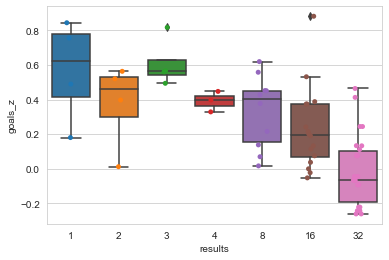

In [790]:
sns.set_style('whitegrid')
ax= sns.boxplot(x='results',y='goals_z',data=stats_df)
ax = sns.stripplot(x="results", y="goals_z",data=stats_df)

In [737]:
# stats_df

In [675]:
stats_df.to_csv('stats_df.csv', index=False)

In [676]:
stats_df.corr()

,Year,goals_z,xg_z,boxtouches_z,progpasses_z,progruns_z,new_xg,Fouled,results
Year,1.000000,-0.197210,-0.160647,-0.048728,0.131122,0.067845,0.132196,-0.089558,0.201249
goals_z,-0.197210,1.000000,0.544171,0.240131,0.114196,0.220640,0.100475,0.272470,-0.690471
xg_z,-0.160647,0.544171,1.000000,0.677593,0.308964,0.420209,-0.012059,0.393507,-0.331697
boxtouches_z,-0.048728,0.240131,0.677593,1.000000,0.400062,0.552609,-0.053563,0.353455,-0.161807
progpasses_z,0.131122,0.114196,0.308964,0.400062,1.000000,0.479448,-0.008676,0.206571,0.018310
progruns_z,0.067845,0.220640,0.420209,0.552609,0.479448,1.000000,0.018426,0.412054,-0.197454
new_xg,0.132196,0.100475,-0.012059,-0.053563,-0.008676,0.018426,1.000000,-0.028548,0.009773
Fouled,-0.089558,0.272470,0.393507,0.353455,0.206571,0.412054,-0.028548,1.000000,-0.276242
results,0.201249,-0.690471,-0.331697,-0.161807,0.018310,-0.197454,0.009773,-0.276242,1.000000


In [677]:
germany = stats_df[stats_df['Country'] == "Germany"]

In [678]:
germany.sort_values('Year')

,Country,Year,goals_z,xg_z,boxtouches_z,progpasses_z,progruns_z,new_xg,Fouled,results
4,Germany,2002,0.563077,0.426923,0.280769,-0.102308,0.011538,1.668033,0.053847,2
3,Germany,2006,0.560000,0.482308,0.450769,0.300769,0.272308,1.487637,1.487637,3
0,Germany,2010,0.816923,0.513077,0.458462,-0.367692,0.142308,1.030100,0.160000,3
1,Germany,2014,0.755385,0.719231,0.601538,0.316154,0.198462,1.650710,0.163846,1
2,Germany,2018,-0.066154,0.615385,1.570000,0.565385,0.930769,-30.732480,0.520000,32


In [679]:
france = stats_df[stats_df['Country'] == "France"]

In [680]:
france

,Country,Year,goals_z,xg_z,boxtouches_z,progpasses_z,progruns_z,new_xg,Fouled,results
39,France,2010,-0.222308,-0.019231,0.155385,-0.379231,0.069231,0.128029,-0.011530,32
40,France,2014,0.376923,0.747692,1.026154,0.130769,0.010769,4.153060,0.030770,8
41,France,2018,0.489231,0.231538,0.189231,-0.039231,0.080769,0.737421,0.140769,1


In [783]:
brazil = stats_df[stats_df['Country'] == "Brazil"]

In [785]:
brazil.sort_values('Year')

,Country,Year,goals_z,xg_z,boxtouches_z,progpasses_z,progruns_z,new_xg,Fouled,results
66,Brazil,2002,0.843846,0.712308,0.245385,-0.181538,0.834615,1.206928,0.235384,1
65,Brazil,2006,0.619231,0.383846,0.277692,0.052308,0.713077,1.321730,0.299231,8
16,Brazil,2010,0.557692,0.186923,0.398462,0.247692,0.937692,1.295170,0.083070,8
17,Brazil,2014,0.328462,0.376154,0.475385,-0.193077,0.408462,2.032780,0.107691,4
18,Brazil,2018,0.427692,0.864615,1.153077,-0.015385,1.092308,4.424460,0.606154,8


In [749]:
england = stats_df[stats_df['Country'] == "England"]

In [750]:
england

,Country,Year,goals_z,xg_z,boxtouches_z,progpasses_z,progruns_z,new_xg,Fouled,results
23,England,2010,-0.000769,0.323077,0.424615,-0.012308,0.154615,-1078.323790,0.133800,16
24,England,2014,-0.093077,0.301538,0.026154,-0.100769,0.210769,-5.074369,0.417692,32
25,England,2018,0.446923,0.404615,0.366923,-0.184615,0.086154,1.531841,0.313077,4


In [747]:
argentina = stats_df[stats_df['Country'] == "Argentina"]

In [748]:
argentina

,Country,Year,goals_z,xg_z,boxtouches_z,progpasses_z,progruns_z,new_xg,Fouled,results
26,Argentina,2010,0.450769,0.496154,0.553846,0.065385,0.020000,2.184302,0.620000,8
27,Argentina,2014,0.011538,0.152308,0.289231,-0.141538,0.170769,27.801178,0.432308,2
28,Argentina,2018,0.373846,0.110000,0.300769,-0.213846,0.743077,1.141975,0.696923,16


In [786]:
spain = stats_df[stats_df['Country'] == "Spain"]

In [787]:
spain.sort_values('Year')

,Country,Year,goals_z,xg_z,boxtouches_z,progpasses_z,progruns_z,new_xg,Fouled,results
64,Spain,2002,0.451538,0.495385,0.182308,-0.222308,0.130769,1.390122,0.445384,8
63,Spain,2006,0.881538,1.015385,0.533077,0.266154,0.080000,1.890053,0.051539,16
8,Spain,2010,0.180000,0.539231,0.868462,0.320000,1.432308,7.230700,0.603070,1
9,Spain,2014,0.243846,0.536154,0.596923,-0.052308,0.489231,3.889500,0.724615,32
10,Spain,2018,0.190769,0.680769,0.763077,0.267692,0.981538,7.375000,0.605385,16


In [781]:
switzerland = stats_df[stats_df['Country'] == "Switzerland"]

In [782]:
switzerland

,Country,Year,goals_z,xg_z,boxtouches_z,progpasses_z,progruns_z,new_xg,Fouled,results
5,Switzerland,2010,-0.222308,0.122308,0.128462,0.071538,-0.068462,-1.761200,-0.386900,32
6,Switzerland,2014,0.387692,0.550769,0.138462,0.213077,0.050769,1.954300,0.059230,16
7,Switzerland,2018,0.241538,0.330769,0.181538,0.113077,0.286923,2.143300,0.156100,16
62,Switzerland,2006,0.113077,0.003846,-0.033077,0.148462,-0.072308,-0.360541,0.297692,16


## World Cup Data from 2018 - 2002

initialized to variable df

In [738]:
# # df = pd.concat(
# #     map(pd.read_csv, ['FIFA - 2018.csv', 'FIFA - 2014.csv', 'FIFA - 2010.csv', 'FIFA - 2006.csv', 'FIFA - 2002.csv', 'FIFA - 1998.csv', 'FIFA - 1994.csv', 'FIFA - 1990.csv', 'FIFA - 1986.csv', 'FIFA - 1982.csv', 'FIFA - 1978.csv', 'FIFA - 1974.csv', 'FIFA - 1970.csv' ]), ignore_index=True)
# # print(df)

# df = pd.concat(
#     map(pd.read_csv, ['FIFA - 2018.csv', 'FIFA - 2014.csv', 'FIFA - 2010.csv', 'FIFA - 2006.csv', 'FIFA - 2002.csv']))


In [739]:
# df.columns

In [740]:
# df.shape

In [741]:
# df.head()

In [742]:
# df.tail()

### change to only teams in world cup 2022

In [696]:
# teams_2022 = ['Qatar', 'Netherlands', 'Senegal', 'Ecuador', 'England', 'USA', 'Wales', 'Iran', 'Argentina', 'Poland', 'Mexico', 'Saudi Arabia', 'France', 'Denmark', 'Tunisia', 'Australia', 'Germany', 'Spain', 'Japan', 'Costa Rica', 'Belgium', 'Croatia', 'Canada', 'Morocco', 'Brazil', 'Switzerland', 'Serbia', 'Cameroon', 'Portugal', 'Uruguay', 'Ghana', 'Korea Republic']

In [697]:
# df = df.loc[df['Team'].isin(teams_2022)]

In [698]:
# df.head()

In [699]:
# df.tail()

Team 	Odds to win 2022 World Cup
- Brazil  	+450
- England 	+550
- France 	+600
- Argentina 	+700
- Spain 	+800


- Germany 	+1,000
- Portugal 	+1,200
- Netherlands 	+1,200
- Belgium 	+1,400
- Denmark 	+2,800

In [777]:
stats_df.corr()

,Year,goals_z,xg_z,boxtouches_z,progpasses_z,progruns_z,new_xg,Fouled,results
Year,1.000000,-0.359426,-0.267989,-0.003947,0.114174,-0.006640,0.085012,-0.163917,0.280675
goals_z,-0.359426,1.000000,0.615541,0.227388,0.107020,0.258342,0.103556,0.280846,-0.682917
xg_z,-0.267989,0.615541,1.000000,0.639295,0.281640,0.405144,-0.001127,0.366125,-0.345026
boxtouches_z,-0.003947,0.227388,0.639295,1.000000,0.393248,0.528139,-0.054655,0.325254,-0.144058
progpasses_z,0.114174,0.107020,0.281640,0.393248,1.000000,0.426228,-0.007527,0.188019,0.036813
progruns_z,-0.006640,0.258342,0.405144,0.528139,0.426228,1.000000,0.021065,0.404195,-0.229097
new_xg,0.085012,0.103556,-0.001127,-0.054655,-0.007527,0.021065,1.000000,-0.022472,0.002301
Fouled,-0.163917,0.280846,0.366125,0.325254,0.188019,0.404195,-0.022472,1.000000,-0.297573
results,0.280675,-0.682917,-0.345026,-0.144058,0.036813,-0.229097,0.002301,-0.297573,1.000000


In [776]:
stats_df.shape

(67, 10)